In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
data1=pd.read_csv("train.csv",encoding='unicode_escape')

In [3]:
data1.head()

Id   Open Date         City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012        Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009    Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

In [4]:
data2=data1.copy()

In [5]:
data3=data2.copy()

In [6]:
data4=data3.copy()

In [7]:
data5=data4.copy()

In [8]:
data6=data5.copy()

In [9]:
data2.head()

Id   Open Date         City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012        Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009    Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

In [10]:
data1.describe()

Id          P1          P2          P3          P4          P5  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean    68.000000    4.014599    4.408759    4.317518    4.372263    2.007299   
std     39.692569    2.910391    1.514900    1.032337    1.016462    1.209620   
min      0.000000    1.000000    1.000000    0.000000    3.000000    1.000000   
25%     34.000000    2.000000    4.000000    4.000000    4.000000    1.000000   
50%     68.000000    3.000000    5.000000    4.000000    4.000000    2.000000   
75%    102.000000    4.000000    5.000000    5.000000    5.000000    2.000000   
max    136.000000   12.000000    7.500000    7.500000    7.500000    8.000000   

               P6          P7          P8          P9  ...         P29  \
count  137.000000  137.000000  137.000000  137.000000  ...  137.000000   
mean     3.357664    5.423358    5.153285    5.445255  ...    3.135036   
std      2.134235    2.296809    1.858567    1.834793  ...    1.680887   
min      1.000000    1.000000    1.000000    4.000000  ...    0.000000   
25%      2.000000    5.000000    4.000000    4.000000  ...    2.500000   
50%      3.000000    5.000000    5.000000    5.000000  ...    3.000000   
75%      4.000000    5.000000    5.000000    5.000000  ...    3.000000   
max     10.000000   10.000000   10.000000   10.000000  ...    7.500000   

              P30         P31         P32         P33         P34         P35  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean     2.729927    1.941606    2.525547    1.138686    2.489051    2.029197   
std      5.536647    3.512093    5.230117    1.698540    5.165093    3.436272   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      4.000000    3.000000    3.000000    2.000000    3.000000    4.000000   
max     25.000000   15.000000   25.000000    6.000000   24.000000   15.000000   

              P36         P37       revenue  
count  137.000000  137.000000  1.370000e+02  
mean     2.211679    1.116788  4.453533e+06  
std      4.168211    1.790768  2.576072e+06  
min      0.000000    0.000000  1.149870e+06  
25%      0.000000    0.000000  2.999068e+06  
50%      0.000000    0.000000  3.939804e+06  
75%      3.000000    2.000000  5.166635e+06  
max     20.000000    8.000000  1.969694e+07  

[8 rows x 39 columns]

In [11]:
data1.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [13]:
data1.shape

(137, 43)

In [14]:
data1.drop("Id",axis=1,inplace = True)

In [15]:
print("\nDuplicate Rows:")
print(data1.duplicated().sum())


Duplicate Rows:
0


In [16]:
numerical_columns = data1.select_dtypes(include=['int', 'float']).columns
skewness = data1[numerical_columns].skew()

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
P1         1.841412
P2         0.040052
P3         0.145334
P4         1.035630
P5         2.414260
P6         1.562815
P7         0.669055
P8         1.474332
P9         1.726721
P10        1.724929
P11        1.324262
P12        1.403638
P13        1.164095
P14        2.879644
P15        2.011790
P16        2.223015
P17        3.451736
P18        1.973559
P19        2.503242
P20        1.642048
P21        2.729971
P22        0.806967
P23        3.276060
P24        1.774883
P25        2.200606
P26        2.149265
P27        2.456601
P28        1.920551
P29        1.541544
P30        2.879599
P31        2.288791
P32        2.916353
P33        1.241610
P34        2.719279
P35        1.985279
P36        2.433065
P37        1.576096
revenue    2.793479
dtype: float64


In [17]:
numerical_columns =data1.select_dtypes(include=['int', 'float']).columns
kurtosis =data1[numerical_columns].kurtosis()

print("kurtosis of numerical features:")
print(kurtosis)

kurtosis of numerical features:
P1          2.580549
P2          0.333510
P3          2.574925
P4          1.092605
P5          8.268874
P6          2.068578
P7          0.812466
P8          1.701709
P9          1.655637
P10         1.598813
P11         2.276893
P12         1.482848
P13         1.157042
P14         9.821666
P15         3.824990
P16         4.584286
P17        17.313603
P18         3.342757
P19         5.865173
P20         2.218108
P21        11.102708
P22        -0.283910
P23        11.740818
P24         2.627133
P25         5.038822
P26         4.528658
P27         7.930033
P28         4.077961
P29         2.330391
P30         8.141788
P31         5.350463
P32         8.549839
P33         0.427485
P34         6.771195
P35         3.537301
P36         5.551100
P37         1.768594
revenue    12.055177
dtype: float64


In [18]:
print("For Train data \n")
print(data1.columns)
print("\nNo. of Columns : ",len(data1.columns))

For Train data 

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

No. of Columns :  42


In [19]:
print("For Train data \n")
numeric_columns=list(data1.select_dtypes(exclude=['object','datetime']).columns)
print(numeric_columns)
print("\nNo. of Numeric Columns : ",len(numeric_columns))

For Train data 

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']

No. of Numeric Columns :  38


In [20]:


print("For Train data \n")
categorical_columns=list(data1.select_dtypes(include=['object']).columns)
print(categorical_columns)
print("No. of Categorical Columns : ",len(categorical_columns))

For Train data 

['Open Date', 'City', 'City Group', 'Type']
No. of Categorical Columns :  4


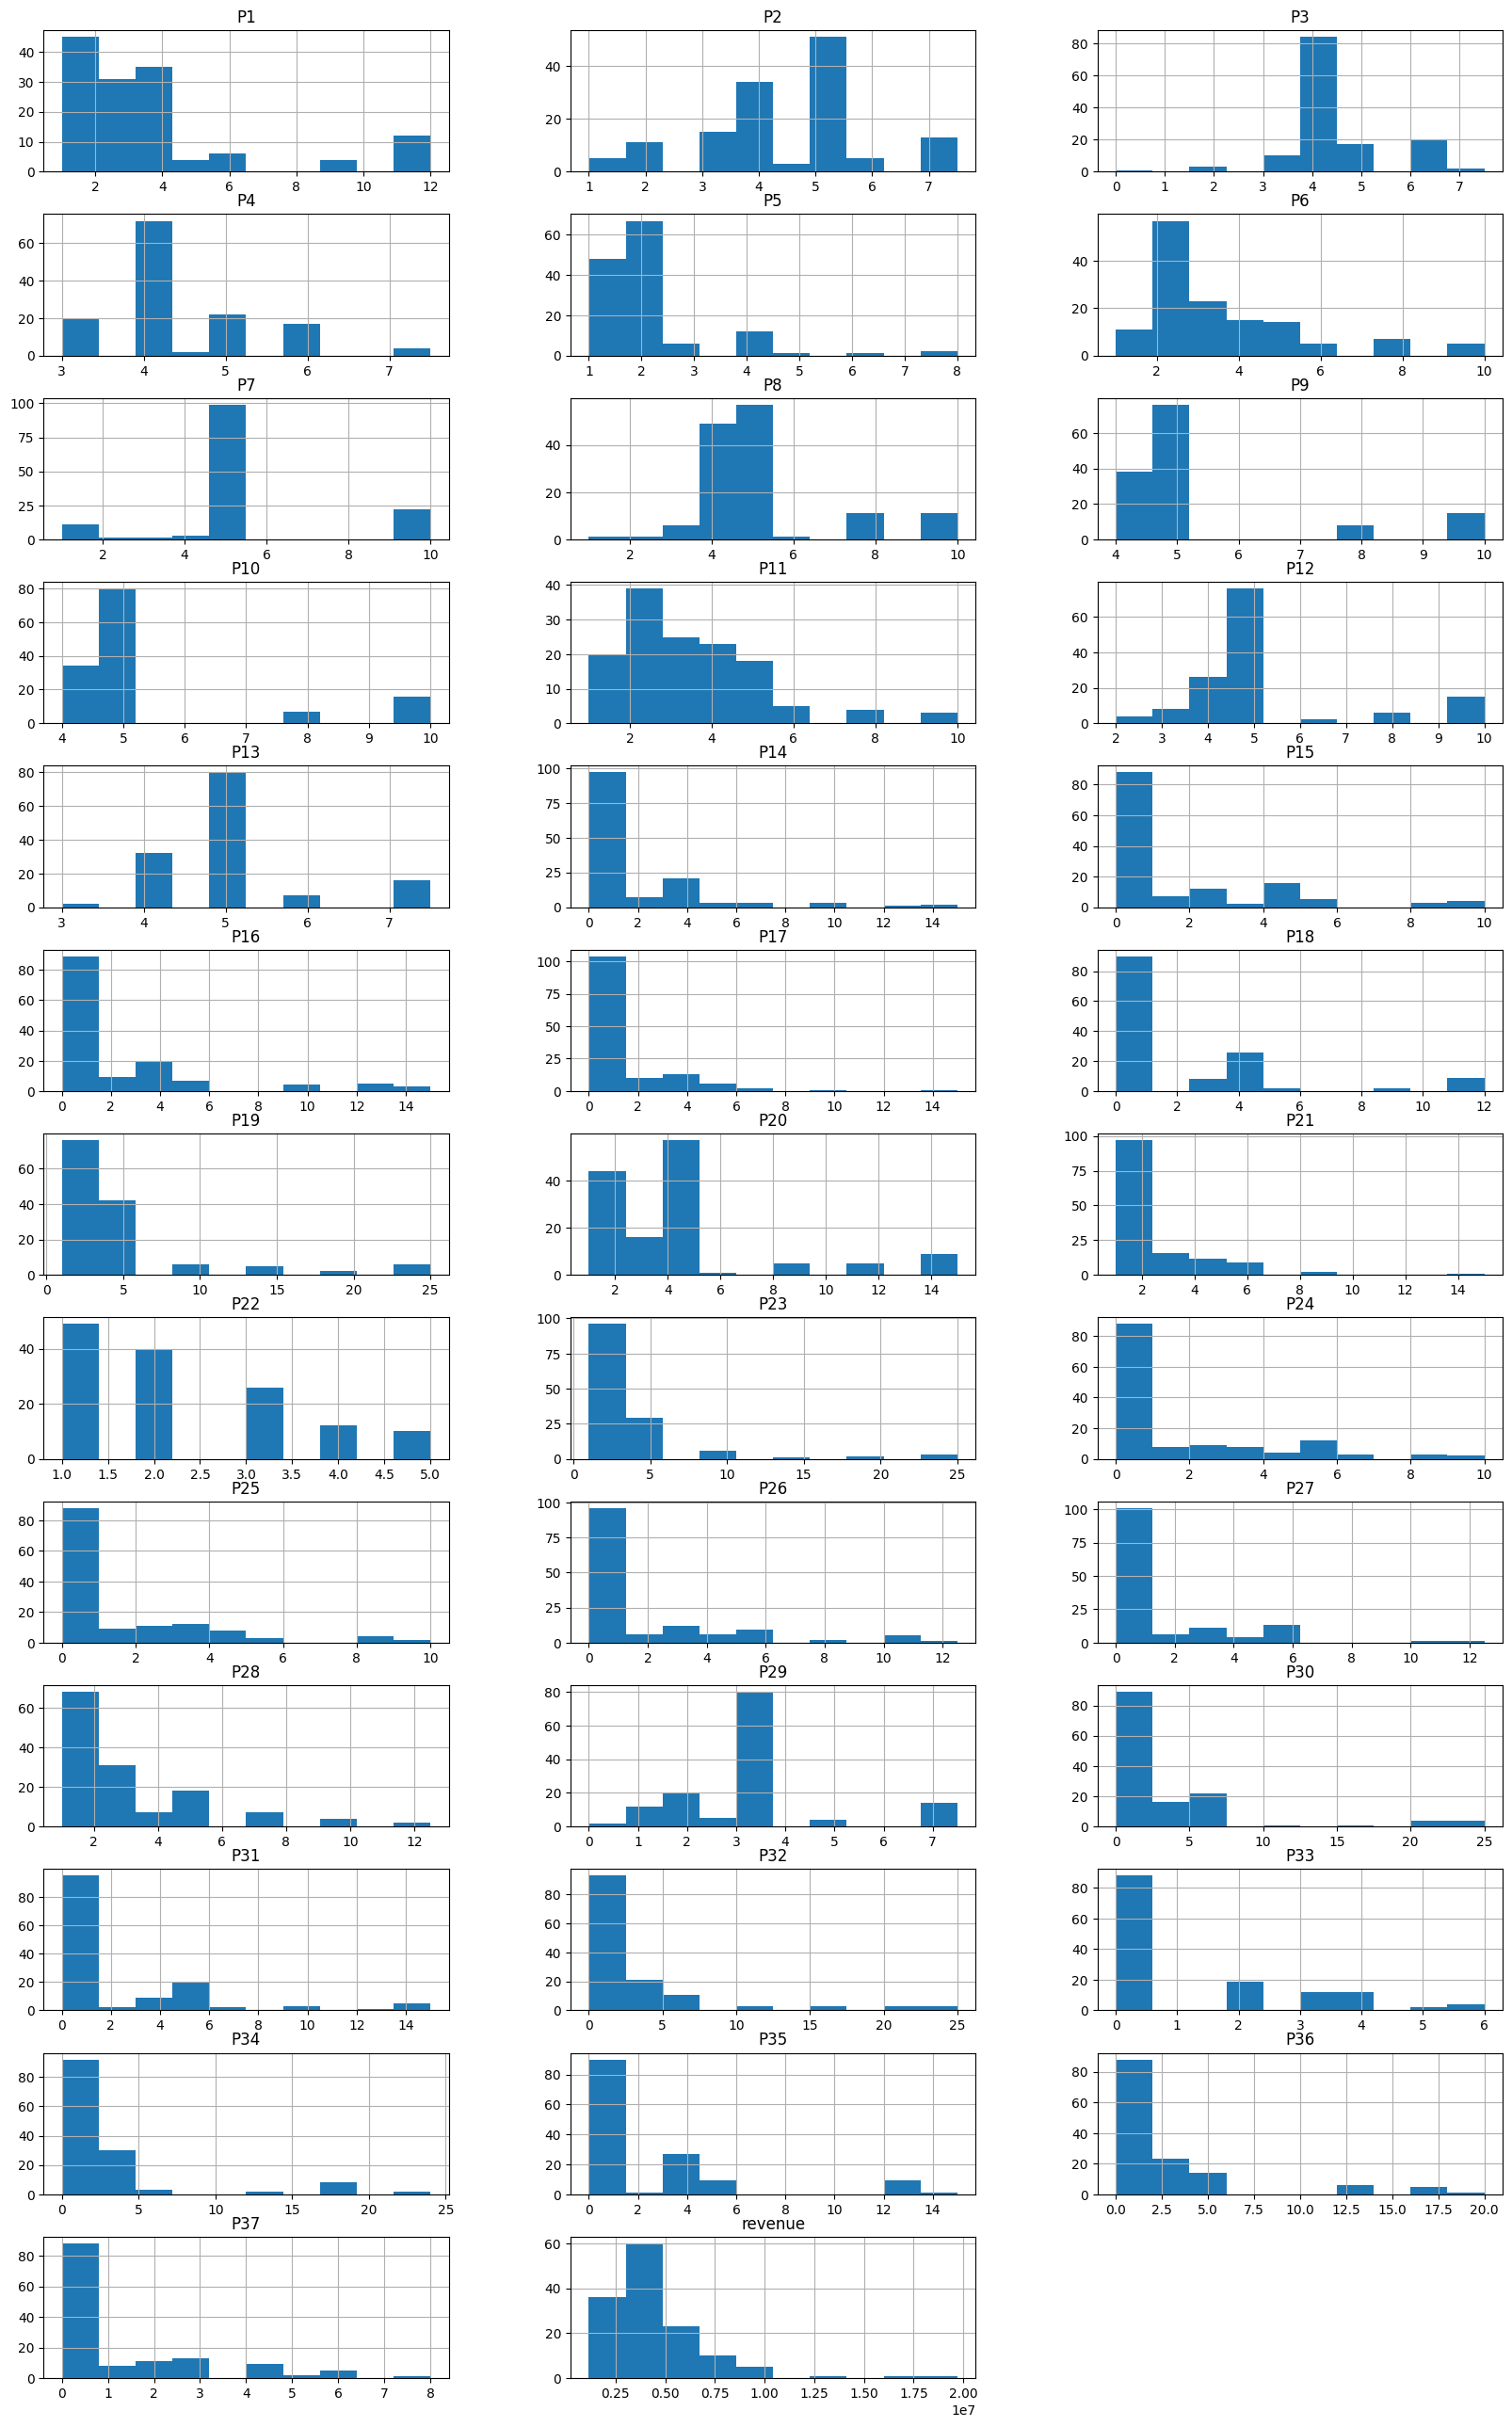

In [21]:
data1.hist(layout=(16,3),figsize=(20,40))
plt.show()

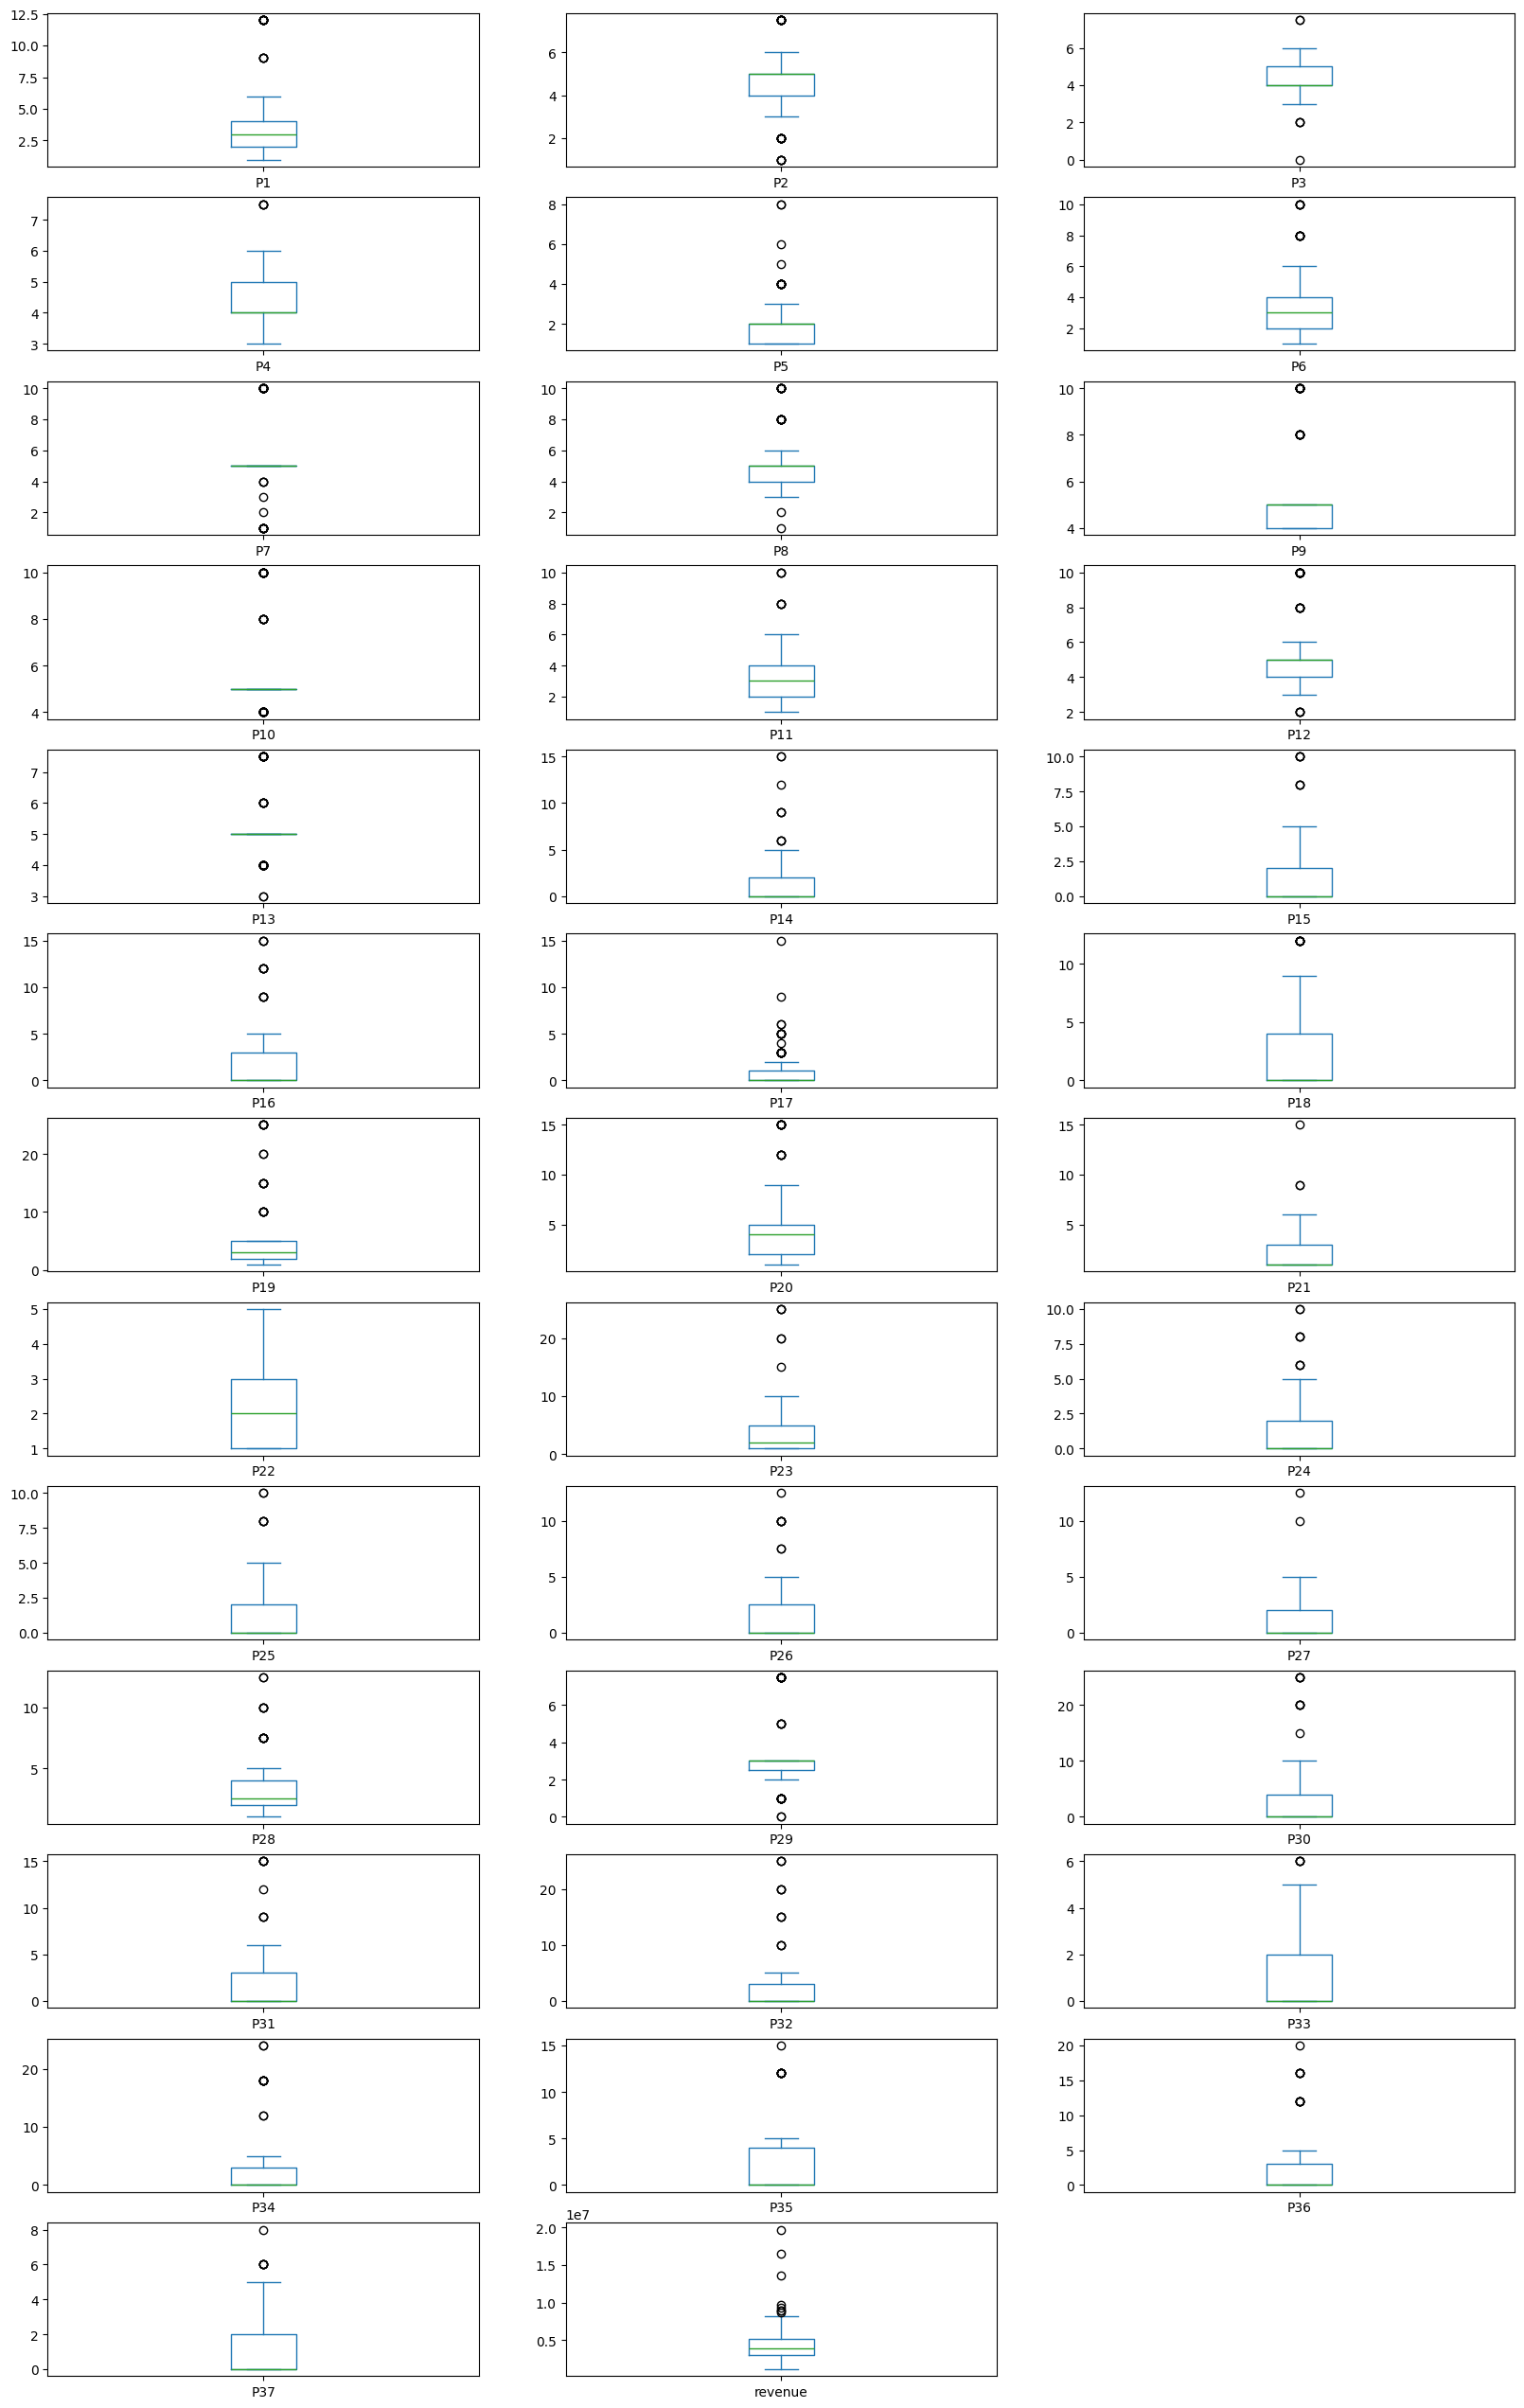

In [22]:
data1.plot(kind='box',layout=(16,3),figsize=(20,40),subplots=True)
plt.show()

In [23]:
data1['Open Date'] = pd.to_datetime(data1['Open Date'])
data1['year'] = data1['Open Date'].apply(lambda x:x.year)
data1['month'] = data1['Open Date'].apply(lambda x:x.month)
data1['day'] = data1['Open Date'].apply(lambda x:x.day)

In [24]:
data1.head()

Open Date         City  City Group Type  P1   P2   P3   P4  P5  P6  ...  \
0 1999-07-17    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2  ...   
1 2008-02-14       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2  ...   
2 2013-03-09  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2   3  ...   
3 2012-02-02        Tokat       Other   IL   6  4.5  6.0  6.0   4   4  ...   
4 2009-05-09    Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2  ...   

   P32  P33  P34  P35  P36  P37    revenue  year  month  day  
0    4    5    5    4    3    4  5653753.0  1999      7   17  
1    0    0    0    0    0    0  6923131.0  2008      2   14  
2    0    0    0    0    0    0  2055379.0  2013      3    9  
3   10    6   18   12   12    6  2675511.0  2012      2    2  
4    3    2    3    4    3    3  4316715.0  2009      5    9  

[5 rows x 45 columns]

C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


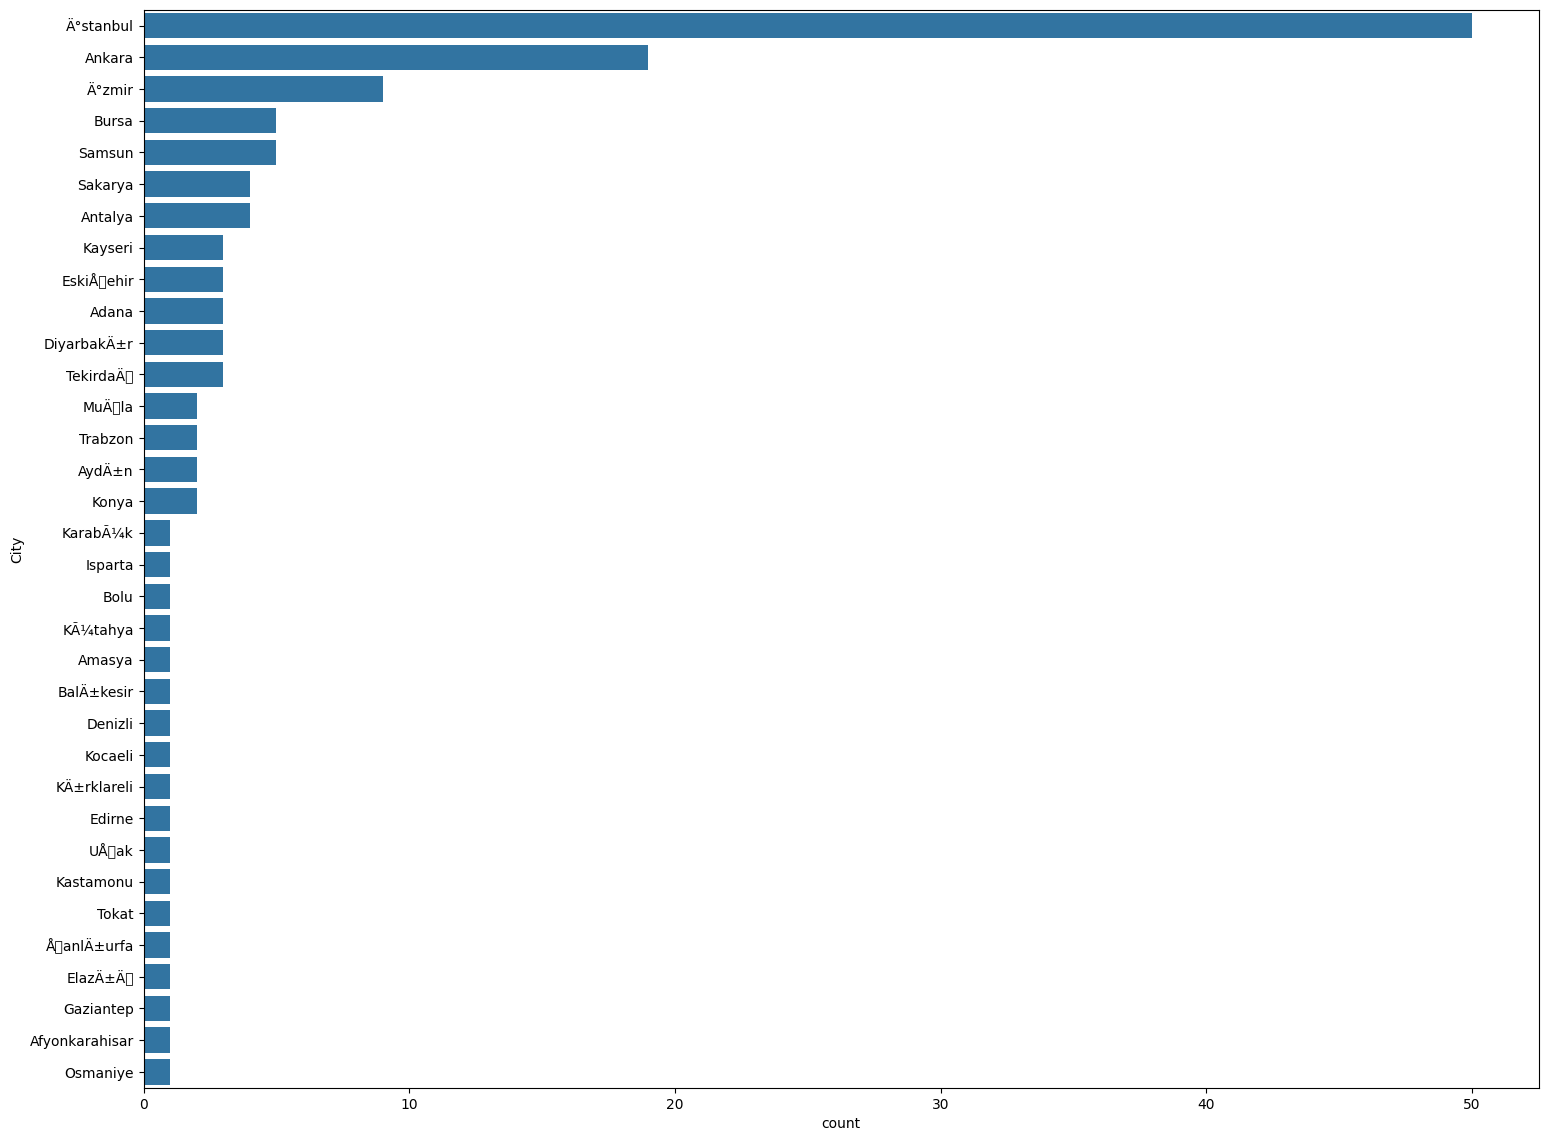

In [25]:
plt.figure(figsize=(18,14))
sns.countplot(data=data1,y='City',order=data1.City.value_counts(ascending=False).index)
plt.show()

In [26]:
counts = data2['City'].value_counts() #counts unique values
percent = ((data2['City'].value_counts()/data2['City'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent})

count percentage
City                            
Ä°stanbul          50      36.5%
Ankara             19      13.9%
Ä°zmir              9       6.6%
Bursa               5       3.6%
Samsun              5       3.6%
Sakarya             4       2.9%
Antalya             4       2.9%
Kayseri             3       2.2%
EskiÅehir          3       2.2%
Adana               3       2.2%
DiyarbakÄ±r         3       2.2%
TekirdaÄ           3       2.2%
MuÄla              2       1.5%
Trabzon             2       1.5%
AydÄ±n              2       1.5%
Konya               2       1.5%
KarabÃ¼k            1       0.7%
Isparta             1       0.7%
Bolu                1       0.7%
KÃ¼tahya            1       0.7%
Amasya              1       0.7%
BalÄ±kesir          1       0.7%
Denizli             1       0.7%
Kocaeli             1       0.7%
KÄ±rklareli         1       0.7%
Edirne              1       0.7%
UÅak               1       0.7%
Kastamonu           1       0.7%
Tokat               1       0.7%
ÅanlÄ±urfa         1       0.7%
ElazÄ±Ä            1       0.7%
Gaziantep           1       0.7%
Afyonkarahisar      1       0.7%
Osmaniye            1       0.7%

C:\Users\Brijesh\AppData\Local\Temp\ipykernel_40864\1008861540.py:34: UserWarning: Glyph 159 (\x9f) missing from current font.
  plt.tight_layout()
C:\Users\Brijesh\AppData\Local\Temp\ipykernel_40864\1008861540.py:34: UserWarning: Glyph 158 (\x9e) missing from current font.
  plt.tight_layout()
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


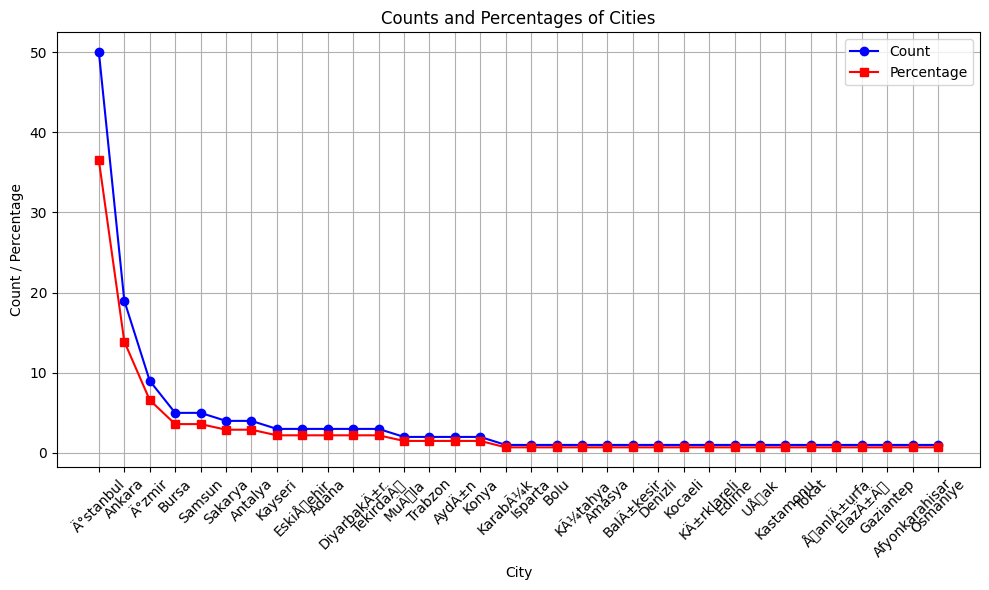

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data2 = pd.DataFrame({'City': data2['City']})

# Calculate counts and percentages
counts = data2['City'].value_counts()
percentages = (data2['City'].value_counts(normalize=True) * 100).round(1)

# Create DataFrame for counts and percentages
city_data = pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for counts
ax.plot(city_data.index, city_data['Count'], marker='o', color='b', label='Count')

# Line plot for percentages
ax.plot(city_data.index, city_data['Percentage'], marker='s', color='r', label='Percentage')

# Adding labels and title
ax.set_xlabel('City')
ax.set_ylabel('Count / Percentage')
ax.set_title('Counts and Percentages of Cities')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
data1.columns

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue', 'year', 'month', 'day'],
      dtype='object')

C:\Users\Brijesh\AppData\Local\Temp\ipykernel_40864\1759756071.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\Brijesh\AppData\Local\Temp\ipykernel_40864\1759756071.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
C:\Users\Brijesh\AppData\Local\Temp\ipykernel_40864\1759756071.py:33: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for patch in ax[0].get_legend().legendHandles:


AttributeError: 'Line2D' object has no attribute 'set_facecolor'

C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 158 (\x9e) missing from current font.
  func(*args, **kwargs)
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


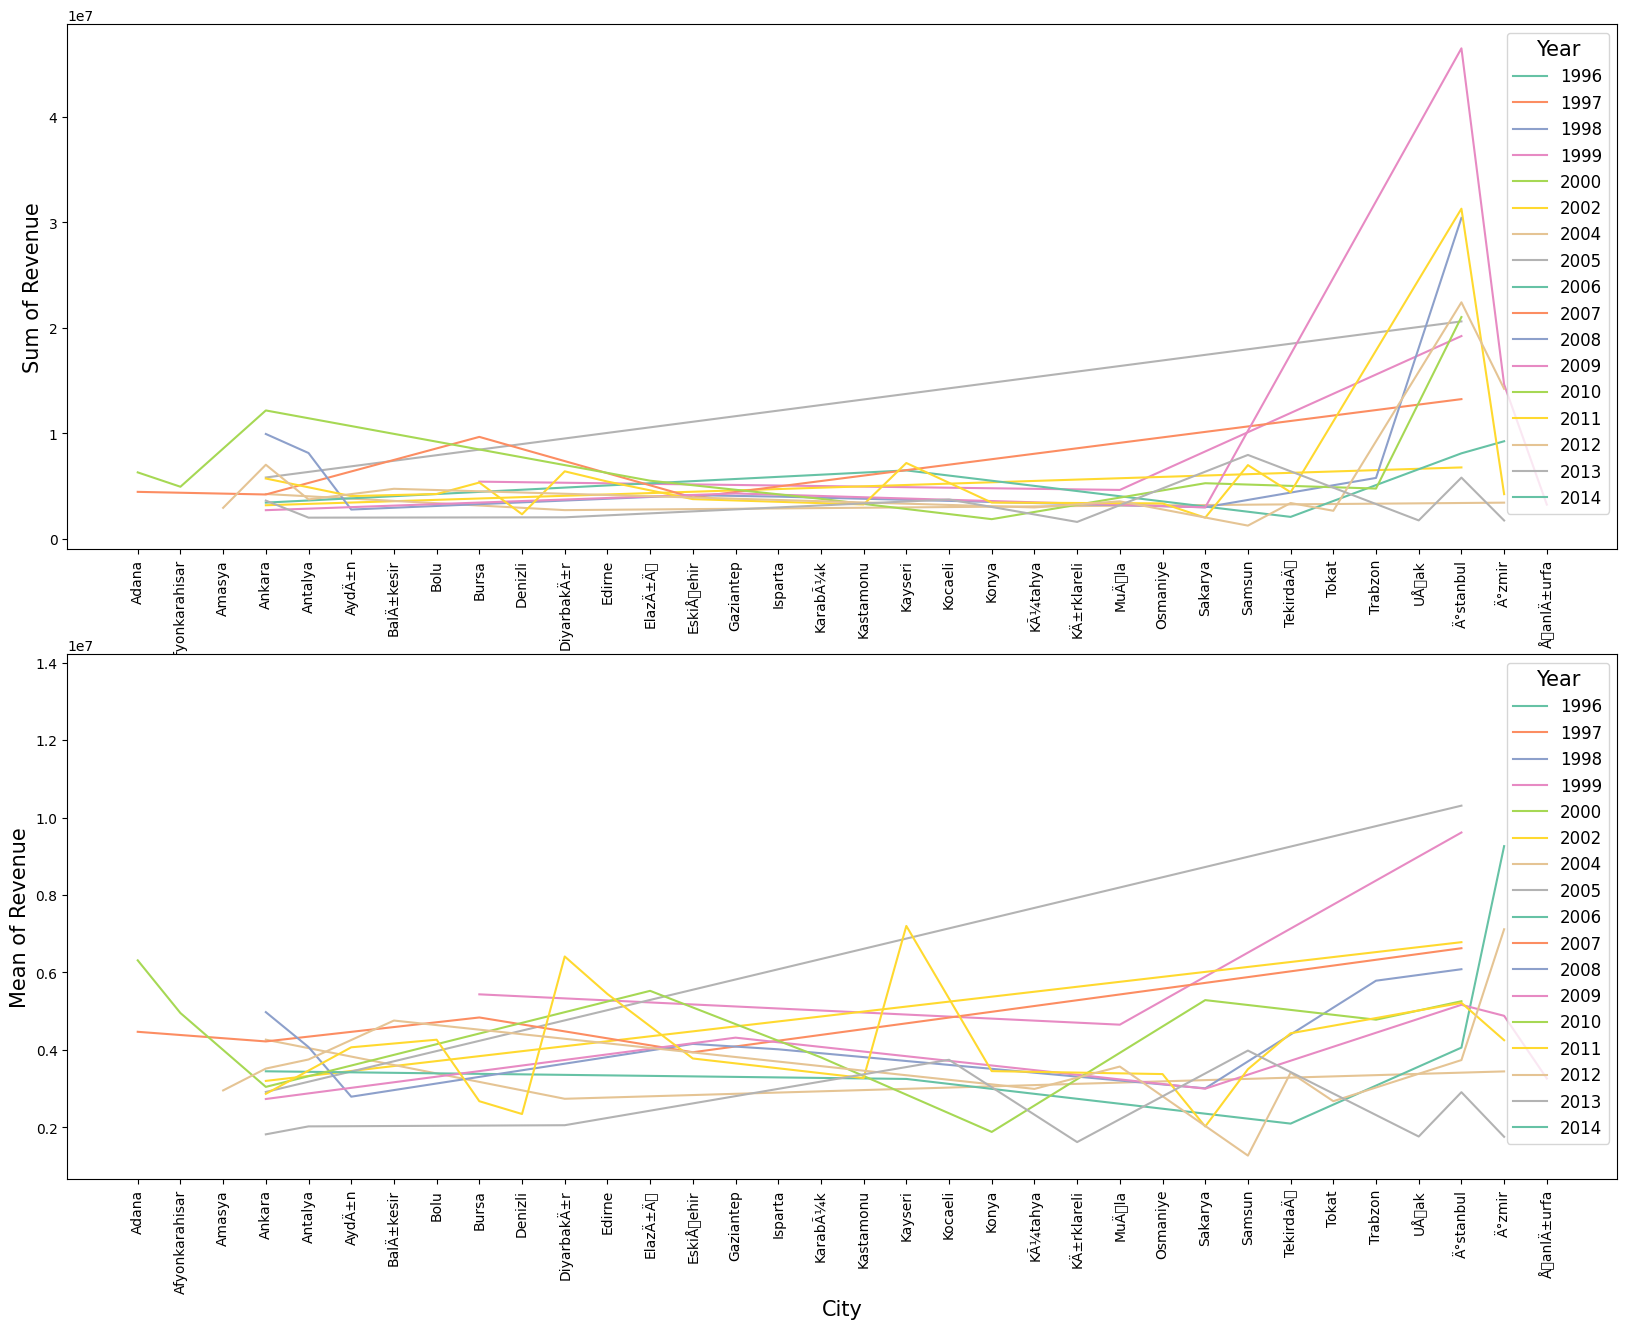

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data1 = pd.DataFrame({'City': data1['City'],
                      'Year': data1['year'],
                      'Revenue': data1['revenue']})

# Group by City and calculate mean and sum of revenue
city_df = data1.groupby(["City", "Year"])["Revenue"].agg(["mean", "sum"]).reset_index()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(20, 15))

# Line plot for sum of revenue
sns.lineplot(x="City", y="sum", hue="Year", data=city_df, ax=ax[0], palette="Set2")
ax[0].set_xlabel("City", fontsize=15)
ax[0].set_ylabel("Sum of Revenue", fontsize=15)
ax[0].legend(title="Year", title_fontsize="15", fontsize="12")

# Line plot for mean of revenue
sns.lineplot(x="City", y="mean", hue="Year", data=city_df, ax=ax[1], palette="Set2")
ax[1].set_xlabel("City", fontsize=15)
ax[1].set_ylabel("Mean of Revenue", fontsize=15)
ax[1].legend(title="Year", title_fontsize="15", fontsize="12")

# Rotate city labels
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

# Change the color of bars representing years
for patch in ax[0].get_legend().legendHandles:
    patch.set_facecolor('lightblue')  # Change the color as per your preference

for patch in ax[1].get_legend().legendHandles:
    patch.set_facecolor('lightgreen')  # Change the color as per your preference

plt.tight_layout()
plt.show()


In [30]:
data3.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [31]:
data3['Open Date'] = pd.to_datetime(data3['Open Date'])
data3['year'] = data3['Open Date'].apply(lambda x:x.year)
data3['month'] = data3['Open Date'].apply(lambda x:x.month)
data3['day'] = data3['Open Date'].apply(lambda x:x.day)

In [32]:
data3.head()

Id  Open Date         City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0 1999-07-17    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1 2008-02-14       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2 2013-03-09  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3 2012-02-02        Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4 2009-05-09    Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P32  P33  P34  P35  P36  P37    revenue  year  month  day  
0    4    5    5    4    3    4  5653753.0  1999      7   17  
1    0    0    0    0    0    0  6923131.0  2008      2   14  
2    0    0    0    0    0    0  2055379.0  2013      3    9  
3   10    6   18   12   12    6  2675511.0  2012      2    2  
4    3    2    3    4    3    3  4316715.0  2009      5    9  

[5 rows x 46 columns]

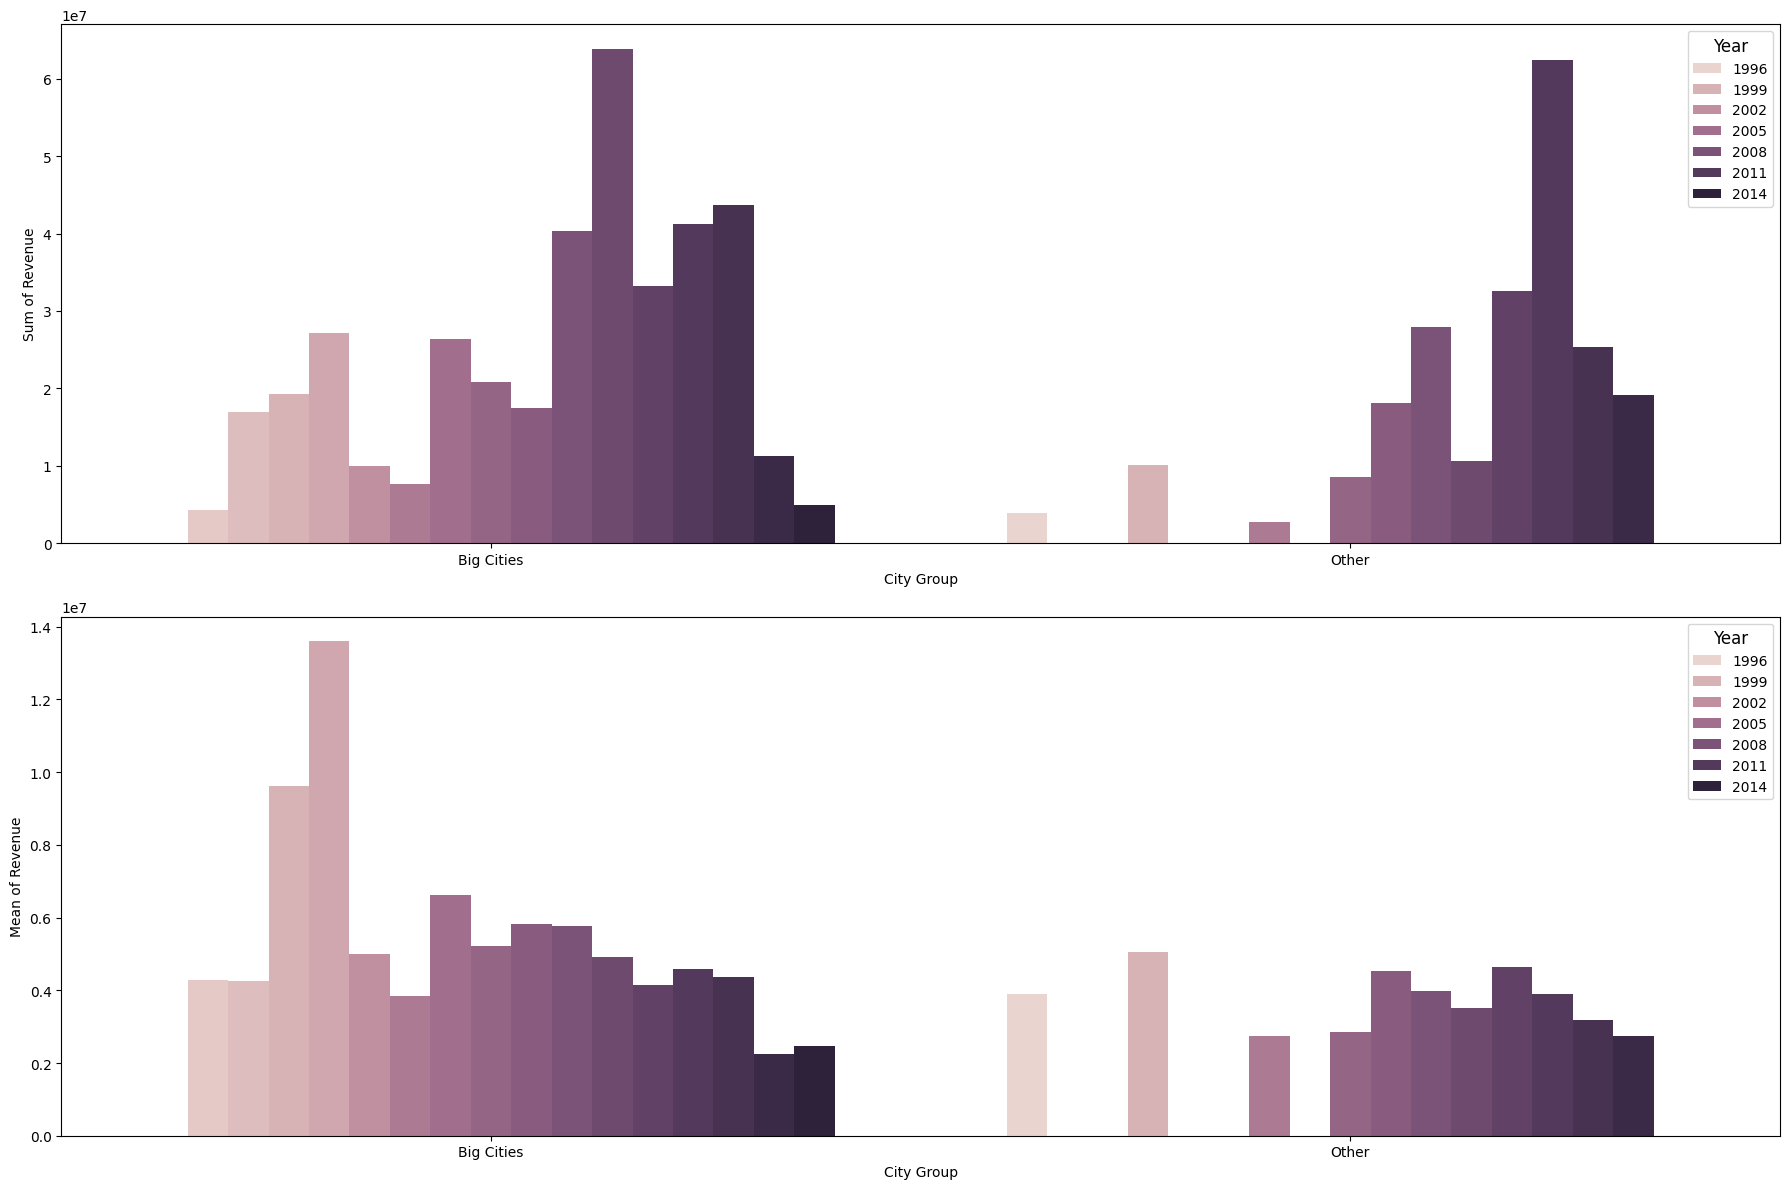

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data1 = pd.DataFrame({'City Group': data3['City Group'],
                      'Year': data3['year'],
                      'revenue': data3['revenue']})

# Group by City Group and Year, calculate mean and sum of revenue
cityg_df = data1.groupby(["City Group", "Year"])["revenue"].agg(["mean", "sum"]).reset_index()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(18, 12))

# Bar plot for sum of revenue
sns.barplot(x="City Group", y="sum", hue="Year", data=cityg_df, ax=ax[0])
ax[0].set_ylabel("Sum of Revenue")
ax[0].legend(title="Year", title_fontsize="12", fontsize="10")

# Bar plot for mean of revenue
sns.barplot(x="City Group", y="mean", hue="Year", data=cityg_df, ax=ax[1])
ax[1].set_ylabel("Mean of Revenue")
ax[1].legend(title="Year", title_fontsize="12", fontsize="10")

plt.tight_layout()
plt.show()


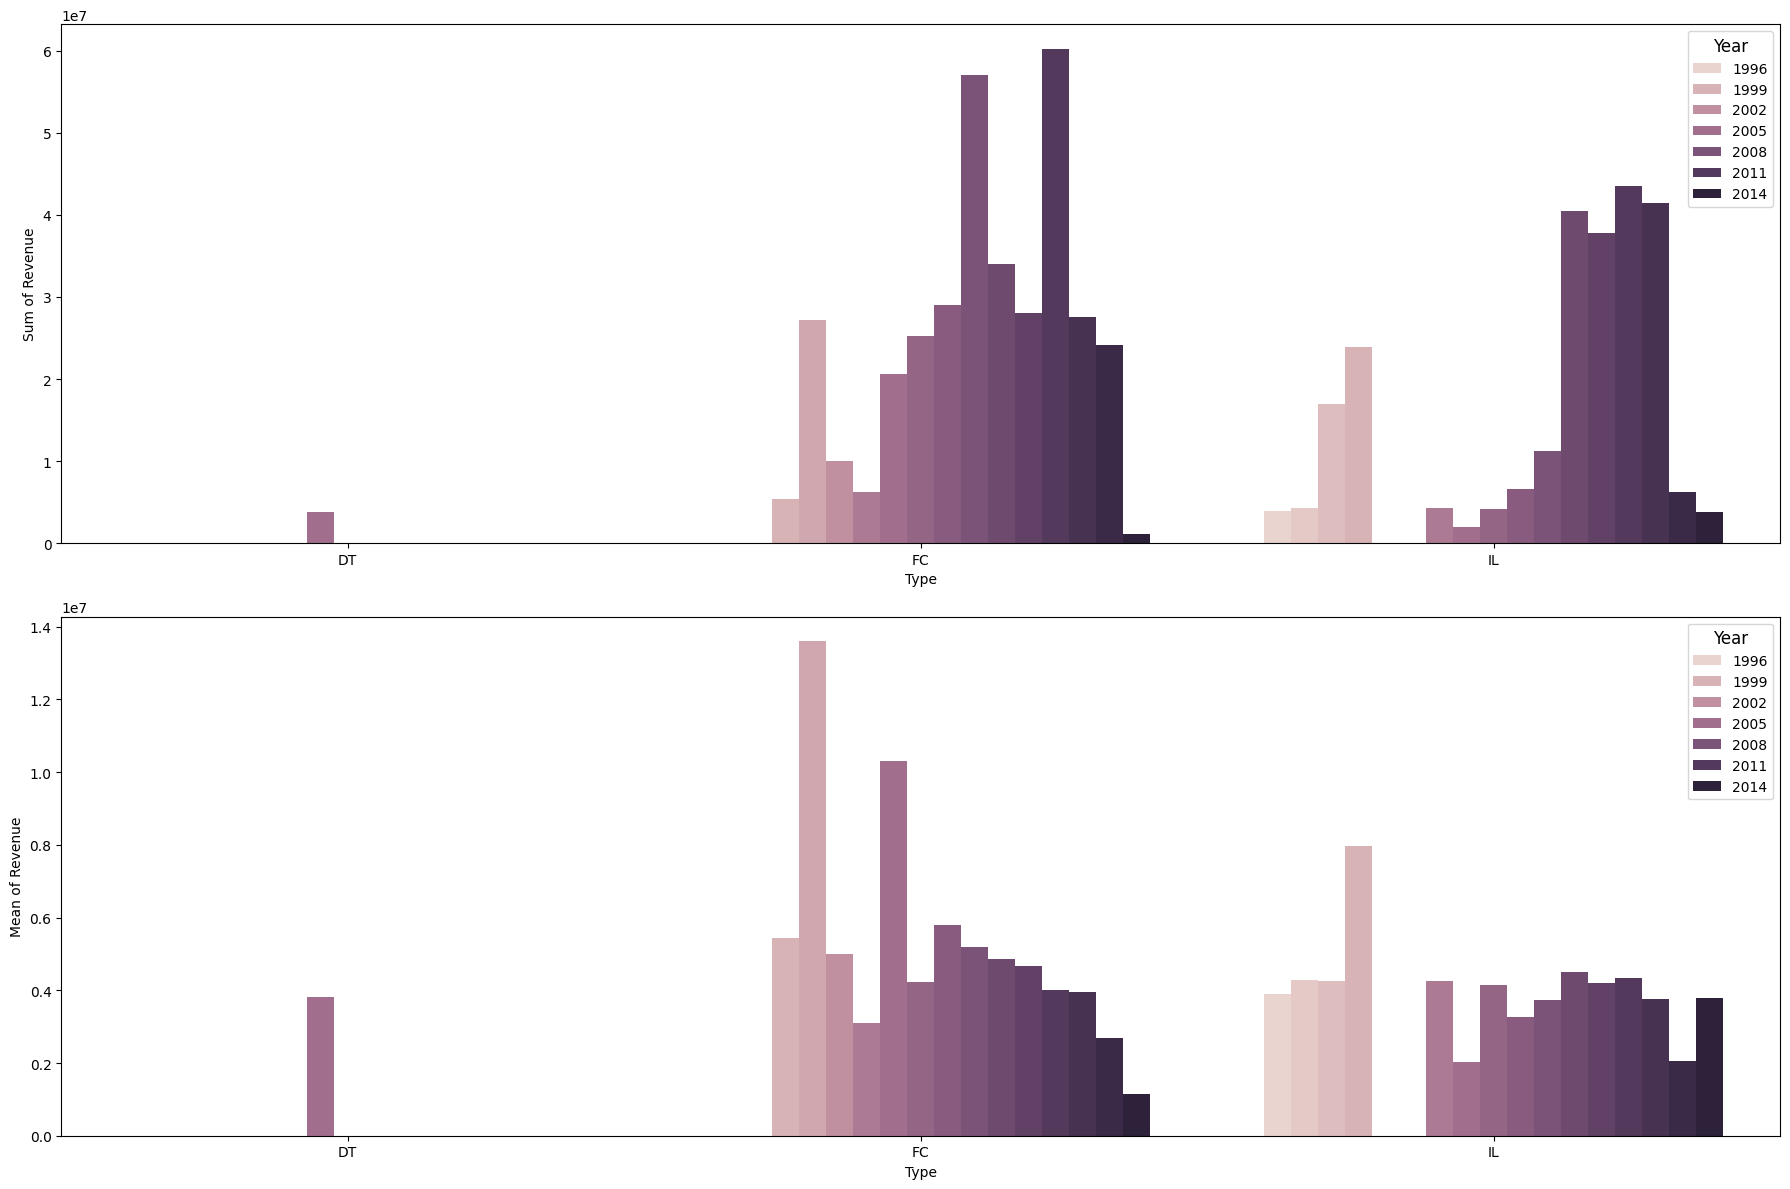

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data1 = pd.DataFrame({'Type': data3['Type'],
                      'Year': data3['year'],
                      'revenue': data3['revenue']})

# Group by Type and Year, calculate mean and sum of revenue
type_df = data1.groupby(["Type", "Year"])["revenue"].agg(["mean", "sum"]).reset_index()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(18, 12))

# Bar plot for sum of revenue
sns.barplot(x="Type", y="sum", hue="Year", data=type_df, ax=ax[0])
ax[0].set_ylabel("Sum of Revenue")
ax[0].legend(title="Year", title_fontsize="12", fontsize="10")

# Bar plot for mean of revenue
sns.barplot(x="Type", y="mean", hue="Year", data=type_df, ax=ax[1])
ax[1].set_ylabel("Mean of Revenue")
ax[1].legend(title="Year", title_fontsize="12", fontsize="10")

plt.tight_layout()
plt.show()


C:\Users\Brijesh\AppData\Local\Temp\ipykernel_40864\2389053997.py:12: UserWarning: Glyph 159 (\x9f) missing from current font.
  plt.tight_layout()
C:\Users\Brijesh\AppData\Local\Temp\ipykernel_40864\2389053997.py:12: UserWarning: Glyph 158 (\x9e) missing from current font.
  plt.tight_layout()
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


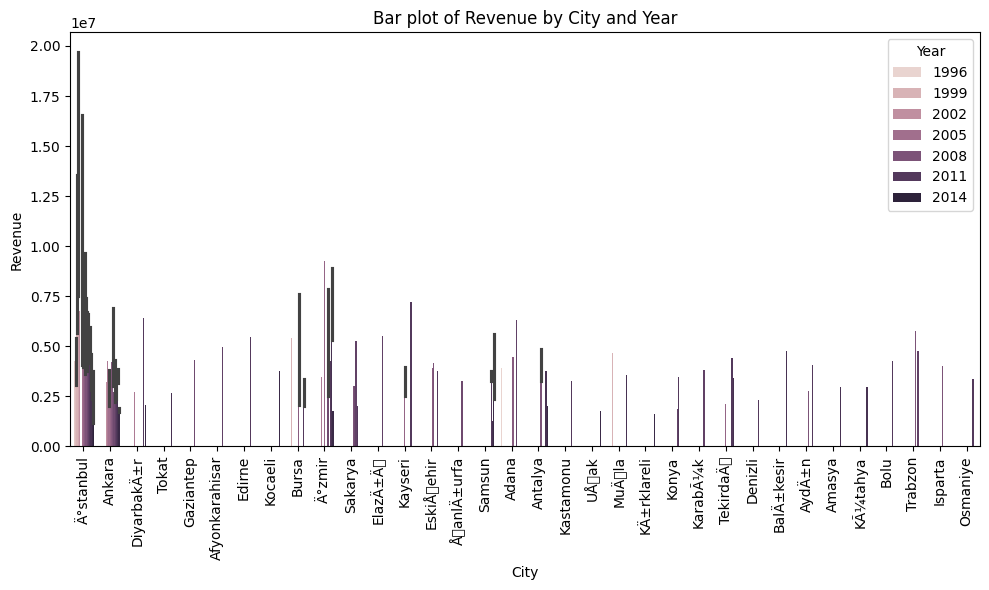

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for revenue by City and Year
plt.figure(figsize=(10, 6))
sns.barplot(x="City", y="revenue", hue=data3["year"], data=data3)
plt.xlabel("City")
plt.ylabel("Revenue")
plt.title("Bar plot of Revenue by City and Year")
plt.legend(title="Year")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if necessary
plt.tight_layout()

plt.show()


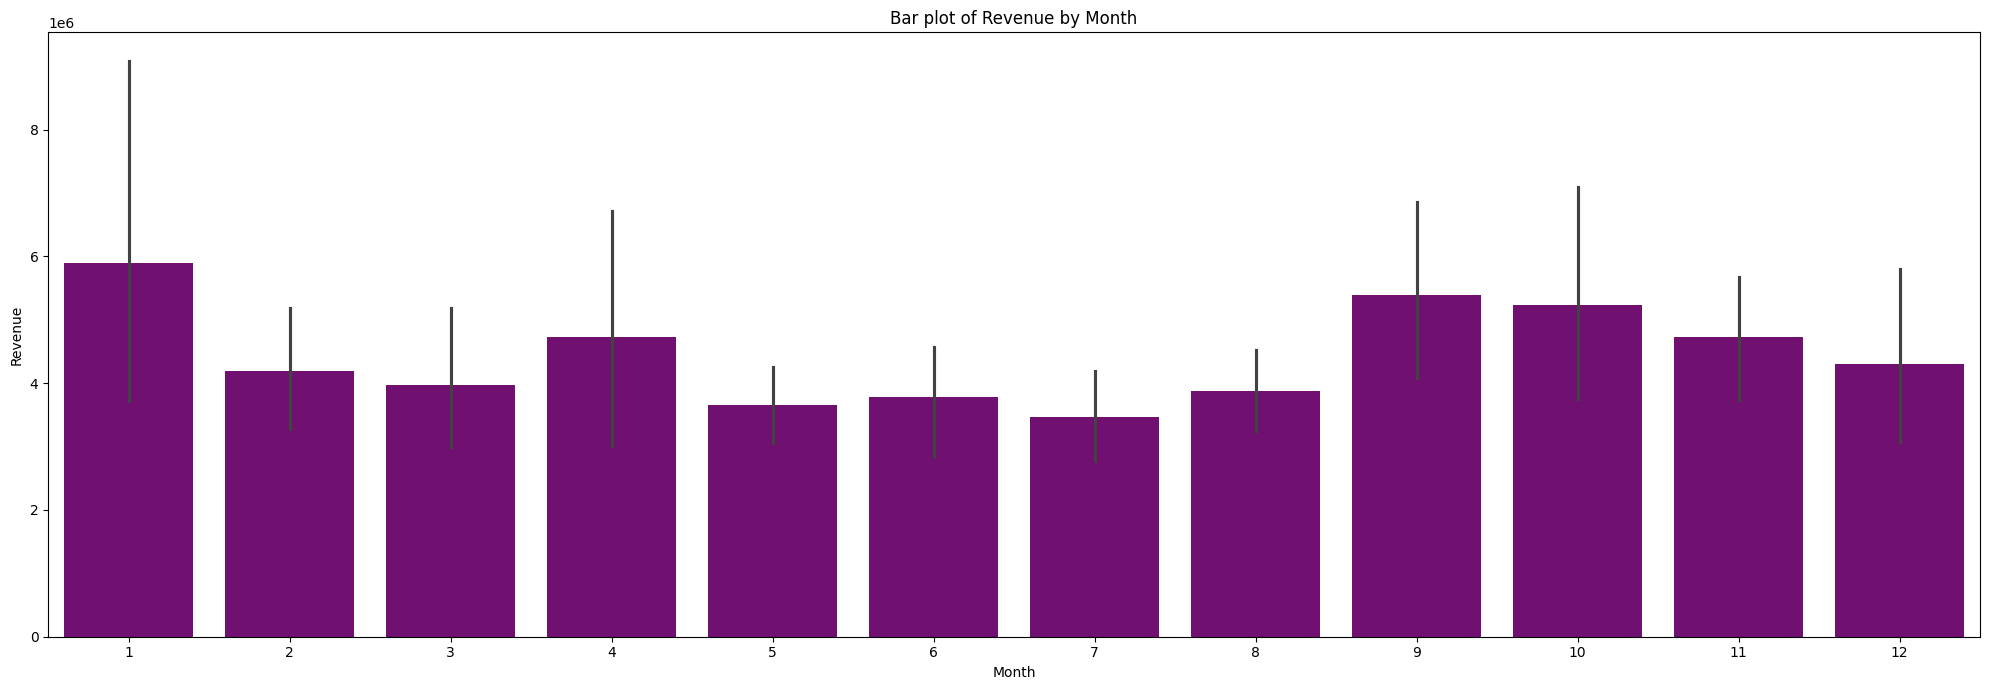

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 7)) 
sns.barplot(x='month', y="revenue", data=data3, color='purple')  # Change the color to sky blue
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Bar plot of Revenue by Month")
plt.tight_layout()

plt.show()


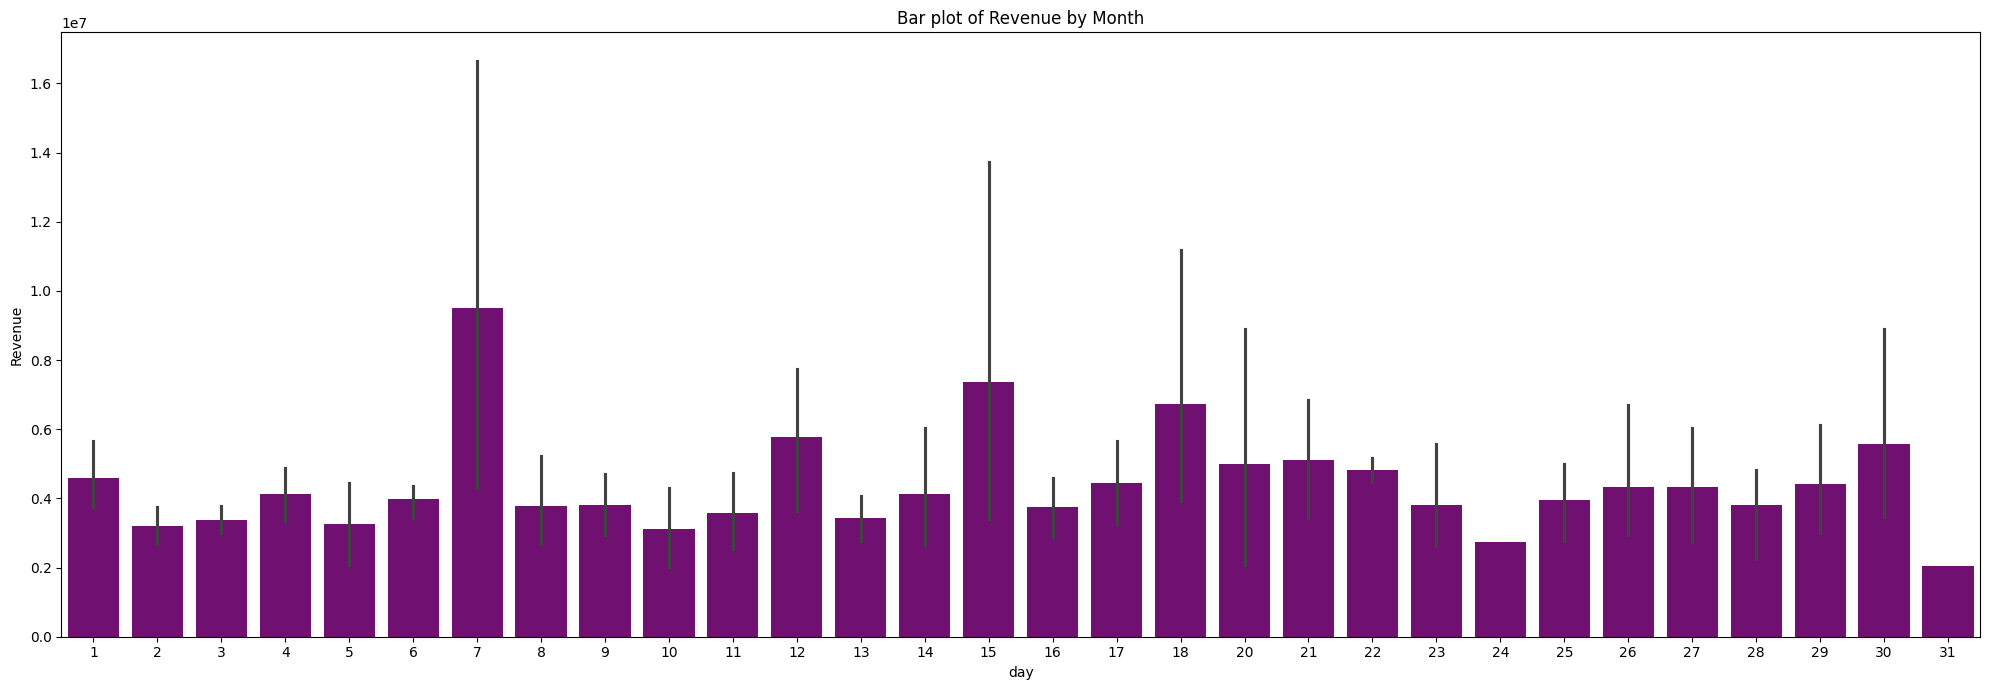

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 7)) 
sns.barplot(x='day', y="revenue", data=data3, color='purple')  # Change the color to sky blue
plt.xlabel("day")
plt.ylabel("Revenue")
plt.title("Bar plot of Revenue by Month")
plt.tight_layout()

plt.show()


In [38]:
data3.head()

Id  Open Date         City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0 1999-07-17    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1 2008-02-14       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2 2013-03-09  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3 2012-02-02        Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4 2009-05-09    Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P32  P33  P34  P35  P36  P37    revenue  year  month  day  
0    4    5    5    4    3    4  5653753.0  1999      7   17  
1    0    0    0    0    0    0  6923131.0  2008      2   14  
2    0    0    0    0    0    0  2055379.0  2013      3    9  
3   10    6   18   12   12    6  2675511.0  2012      2    2  
4    3    2    3    4    3    3  4316715.0  2009      5    9  

[5 rows x 46 columns]

In [39]:
data3.drop(['Open Date'],axis=1,inplace=True)

In [40]:
data3.head()

Id         City  City Group Type  P1   P2   P3   P4  P5  P6  ...  P32  P33  \
0   0    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2  ...    4    5   
1   1       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2  ...    0    0   
2   2  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2   3  ...    0    0   
3   3        Tokat       Other   IL   6  4.5  6.0  6.0   4   4  ...   10    6   
4   4    Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2  ...    3    2   

   P34  P35  P36  P37    revenue  year  month  day  
0    5    4    3    4  5653753.0  1999      7   17  
1    0    0    0    0  6923131.0  2008      2   14  
2    0    0    0    0  2055379.0  2013      3    9  
3   18   12   12    6  2675511.0  2012      2    2  
4    3    4    3    3  4316715.0  2009      5    9  

[5 rows x 45 columns]

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Assuming your DataFrame is named 'T_data1'
label_encoder = LabelEncoder()

# Encode 'City Group' column
data3['City Group'] = label_encoder.fit_transform(data3['City Group'])

# One-hot encode 'City' and 'Type' columns
data3 = pd.get_dummies(data3, columns=['City', 'Type'], drop_first=True)

# Convert boolean columns to integers (0 and 1)
data3 = data3.astype(int)

# Display the updated DataFrame
print(data3.head())


   Id  City Group  P1  P2  P3  P4  P5  P6  P7  P8  ...  City_Samsun  \
0   0           0   4   5   4   4   2   2   5   4  ...            0   
1   1           0   4   5   4   4   1   2   5   5  ...            0   
2   2           1   2   4   2   5   2   3   5   5  ...            0   
3   3           1   6   4   6   6   4   4  10   8  ...            0   
4   4           1   3   4   3   4   2   2   5   5  ...            0   

   City_TekirdaÄ  City_Tokat  City_Trabzon  City_UÅak  City_Ä°stanbul  \
0               0           0             0           0               1   
1               0           0             0           0               0   
2               0           0             0           0               0   
3               0           1             0           0               0   
4               0           0             0           0               0   

   City_Ä°zmir  City_ÅanlÄ±urfa  Type_FC  Type_IL  
0            0                 0        0        1  
1            0  

In [42]:
data3.columns

Index(['Id', 'City Group', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18',
       'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28',
       'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'year', 'month', 'day', 'City_Afyonkarahisar', 'City_Amasya',
       'City_Ankara', 'City_Antalya', 'City_AydÄ±n', 'City_BalÄ±kesir',
       'City_Bolu', 'City_Bursa', 'City_Denizli', 'City_DiyarbakÄ±r',
       'City_Edirne', 'City_ElazÄ±Ä', 'City_EskiÅehir', 'City_Gaziantep',
       'City_Isparta', 'City_KarabÃ¼k', 'City_Kastamonu', 'City_Kayseri',
       'City_Kocaeli', 'City_Konya', 'City_KÃ¼tahya', 'City_KÄ±rklareli',
       'City_MuÄla', 'City_Osmaniye', 'City_Sakarya', 'City_Samsun',
       'City_TekirdaÄ', 'City_Tokat', 'City_Trabzon', 'City_UÅak',
       'City_Ä°stanbul', 'City_Ä°zmir', 'City_ÅanlÄ±urfa', 'Type_FC',
       'Type_IL'],
      dtype='object')

In [43]:
data3['Revenue']= data3['revenue']
data3.drop('revenue', axis=1, inplace=True)
data3


Id  City Group  P1  P2  P3  P4  P5  P6  P7  P8  ...  City_TekirdaÄ  \
0      0           0   4   5   4   4   2   2   5   4  ...               0   
1      1           0   4   5   4   4   1   2   5   5  ...               0   
2      2           1   2   4   2   5   2   3   5   5  ...               0   
3      3           1   6   4   6   6   4   4  10   8  ...               0   
4      4           1   3   4   3   4   2   2   5   5  ...               0   
..   ...         ...  ..  ..  ..  ..  ..  ..  ..  ..  ...             ...   
132  132           1   2   3   3   5   4   2   4   4  ...               0   
133  133           0   4   5   4   4   2   3   5   4  ...               0   
134  134           1   3   4   4   4   2   3   5   5  ...               0   
135  135           0   4   5   4   5   2   2   5   5  ...               0   
136  136           0   4   5   3   5   2   2   5   4  ...               0   

     City_Tokat  City_Trabzon  City_UÅak  City_Ä°stanbul  City_Ä°zmir  \
0             0             0           0               1            0   
1             0             0           0               0            0   
2             0             0           0               0            0   
3             1             0           0               0            0   
4             0             0           0               0            0   
..          ...           ...         ...             ...          ...   
132           0             1           0               0            0   
133           0             0           0               0            1   
134           0             0           0               0            0   
135           0             0           0               1            0   
136           0             0           0               1            0   

     City_ÅanlÄ±urfa  Type_FC  Type_IL  Revenue  
0                   0        0        1  5653753  
1                   0        1        0  6923131  
2                   0        0        1  2055379  
3                   0        0        1  2675511  
4                   0        0        1  4316715  
..                ...      ...      ...      ...  
132                 0        1        0  5787594  
133                 0        1        0  9262754  
134                 0        1        0  2544857  
135                 0        1        0  7217634  
136                 0        1        0  6363241  

[137 rows x 78 columns]

C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.draw()
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.draw()
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


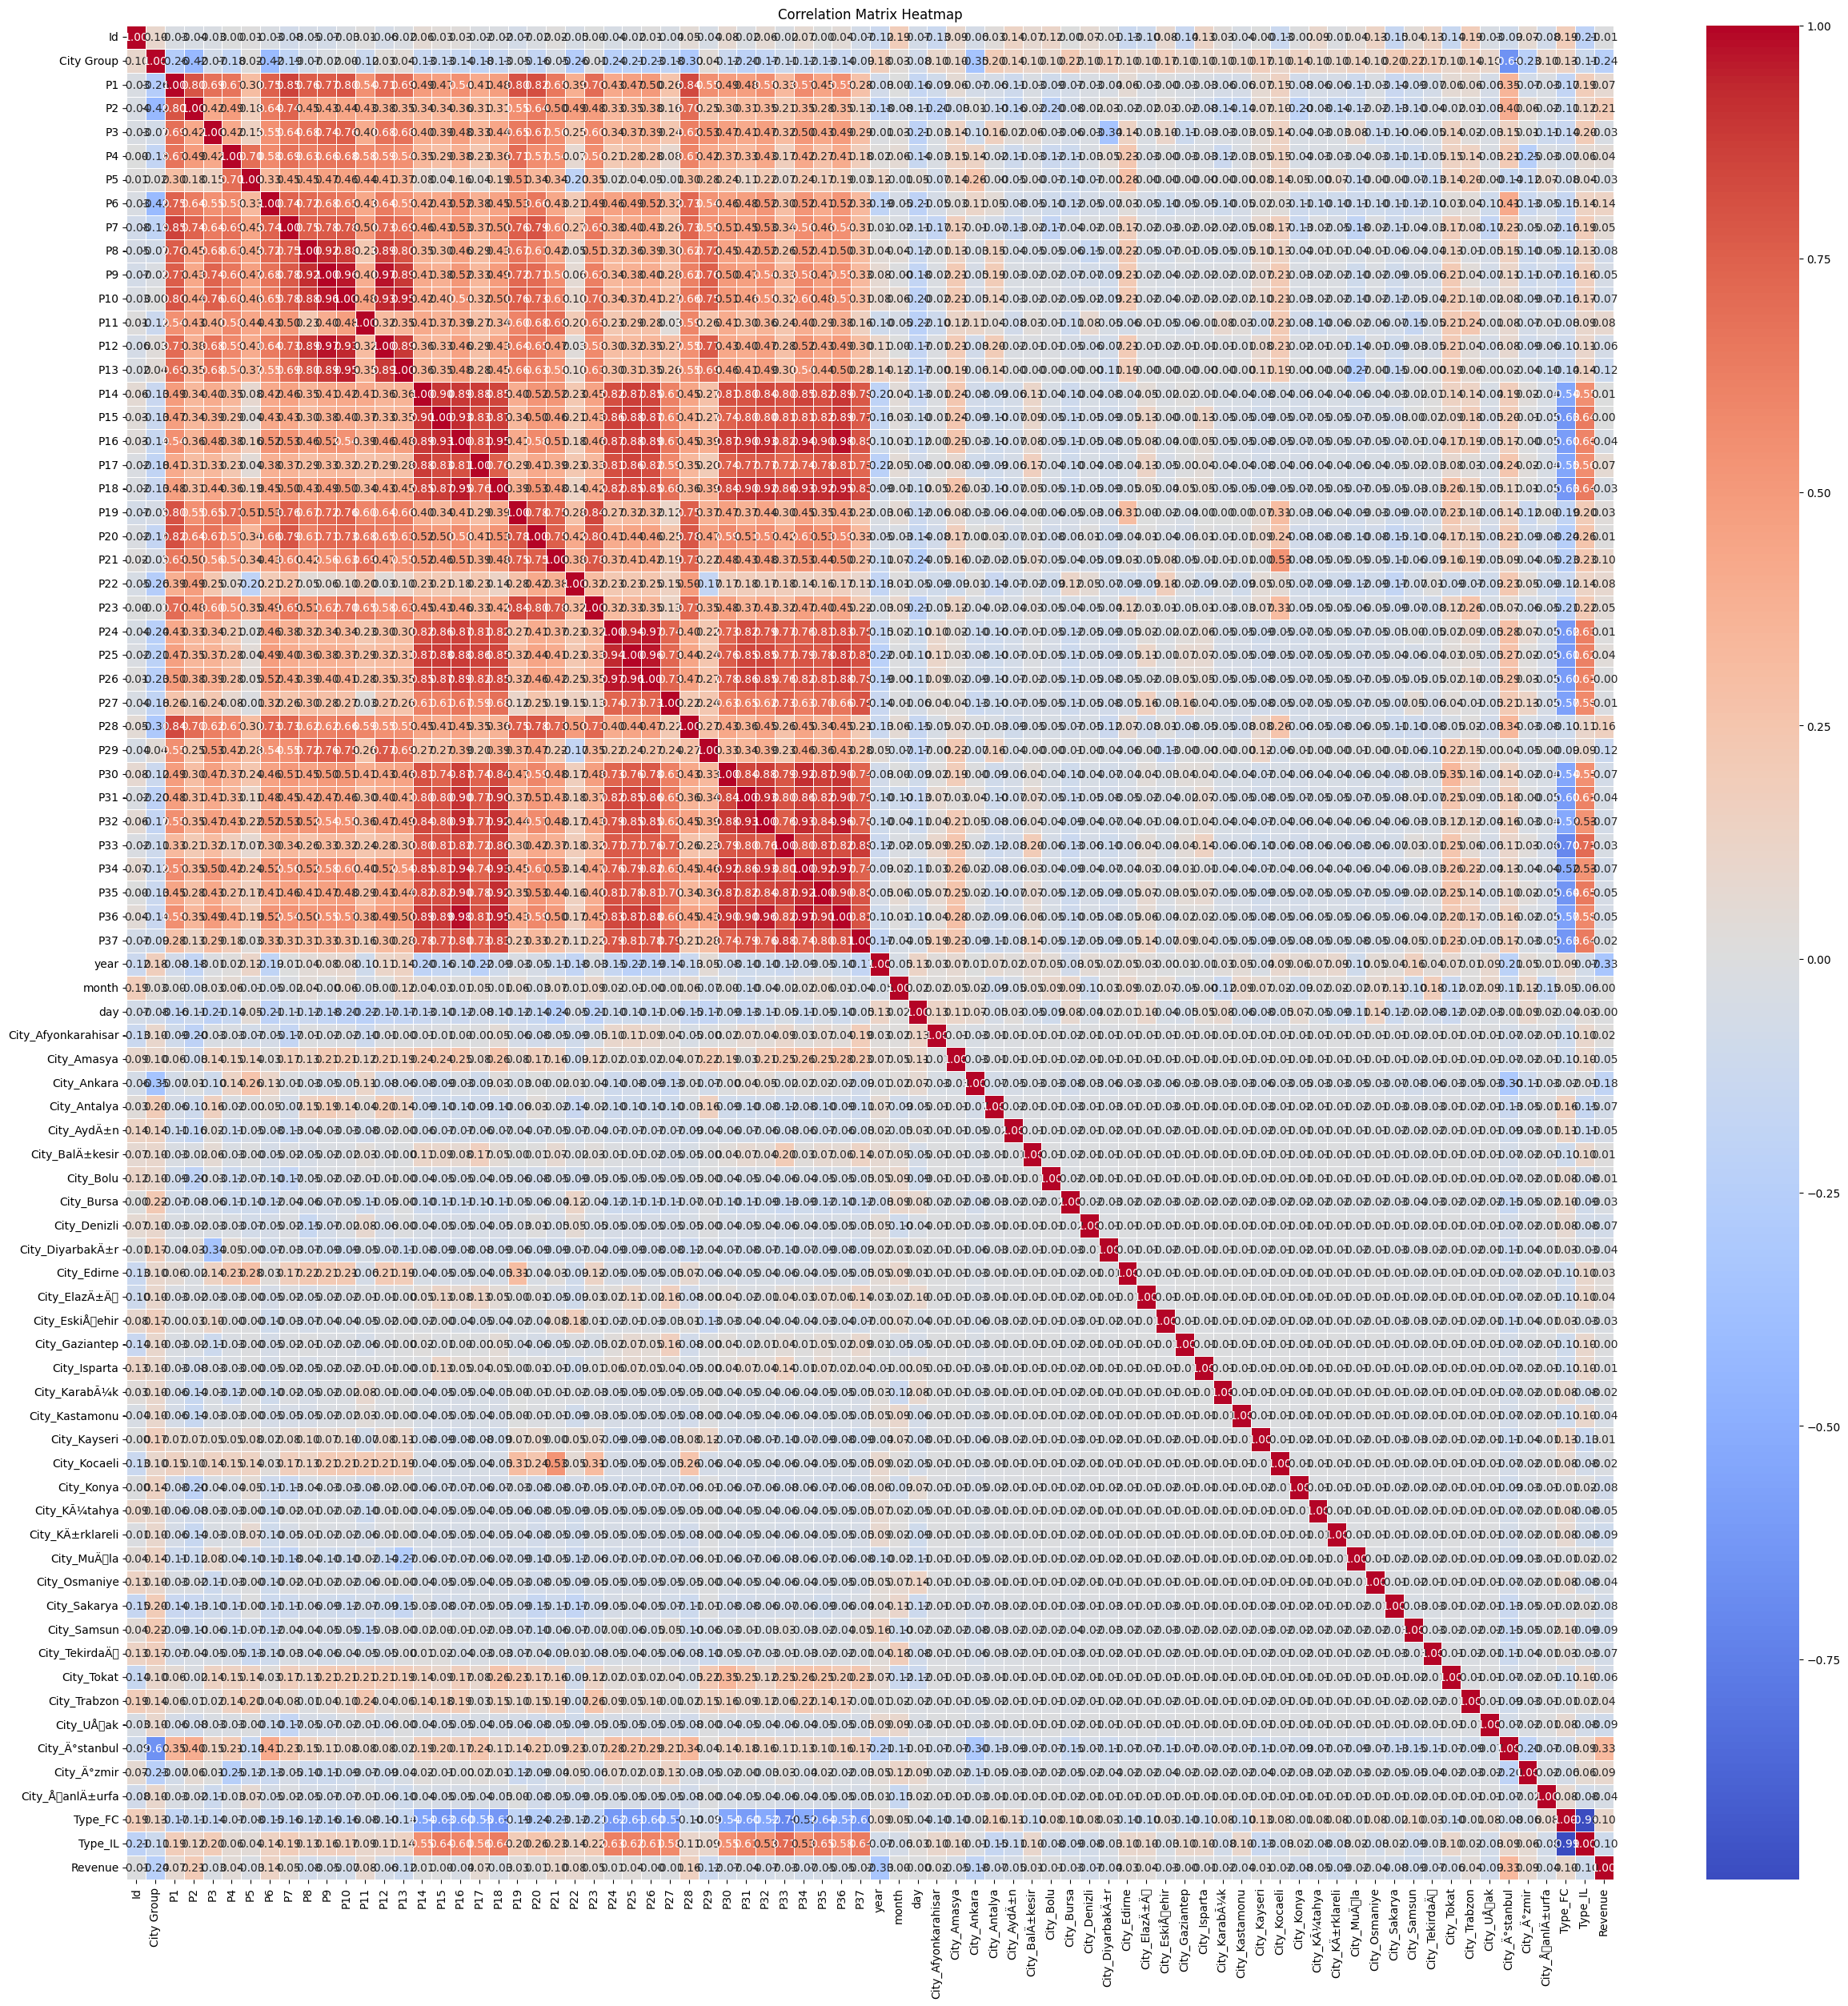

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data3.corr()

# Plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.title('Correlation Matrix Heatmap')
plt.show()

In [45]:
data3.isnull().sum()

Id                  0
City Group          0
P1                  0
P2                  0
P3                  0
                   ..
City_Ä°zmir         0
City_ÅanlÄ±urfa    0
Type_FC             0
Type_IL             0
Revenue             0
Length: 78, dtype: int64

In [46]:
numerical_columns = data3.select_dtypes(include=['int', 'float']).columns
skewness = data3[numerical_columns].skew()

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
Id                   0.000000
City Group           0.283189
P1                   1.841412
P2                  -0.236271
P3                   0.000715
                      ...    
City_Ä°zmir          3.545004
City_ÅanlÄ±urfa    11.704700
Type_FC             -0.222749
Type_IL              0.252885
Revenue              2.793479
Length: 78, dtype: float64


In [47]:
numerical_columns = data3.select_dtypes(include=['int', 'float']).columns
kurtosis = data3[numerical_columns].kurtosis()

print("Kurtosis of numerical features:")
print(kurtosis)

Kurtosis of numerical features:
Id                   -1.200000
City Group           -1.948467
P1                    2.580549
P2                    0.129114
P3                    2.309595
                       ...    
City_Ä°zmir          10.723399
City_ÅanlÄ±urfa    137.000000
Type_FC              -1.979499
Type_IL              -1.964952
Revenue              12.055177
Length: 78, dtype: float64


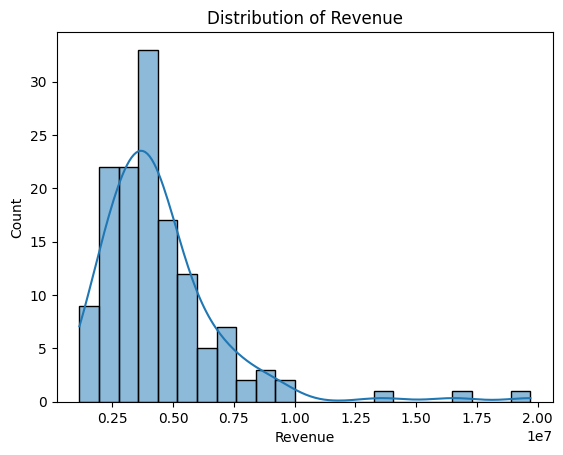

In [48]:
sns.histplot(data3['Revenue'], kde=True)
plt.title('Distribution of Revenue')
plt.show()

In [49]:
revenue_skewness = skew(data3['Revenue'])
print("Skewness of the target revenue:", revenue_skewness)

Skewness of the target revenue: 2.76279966221059


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


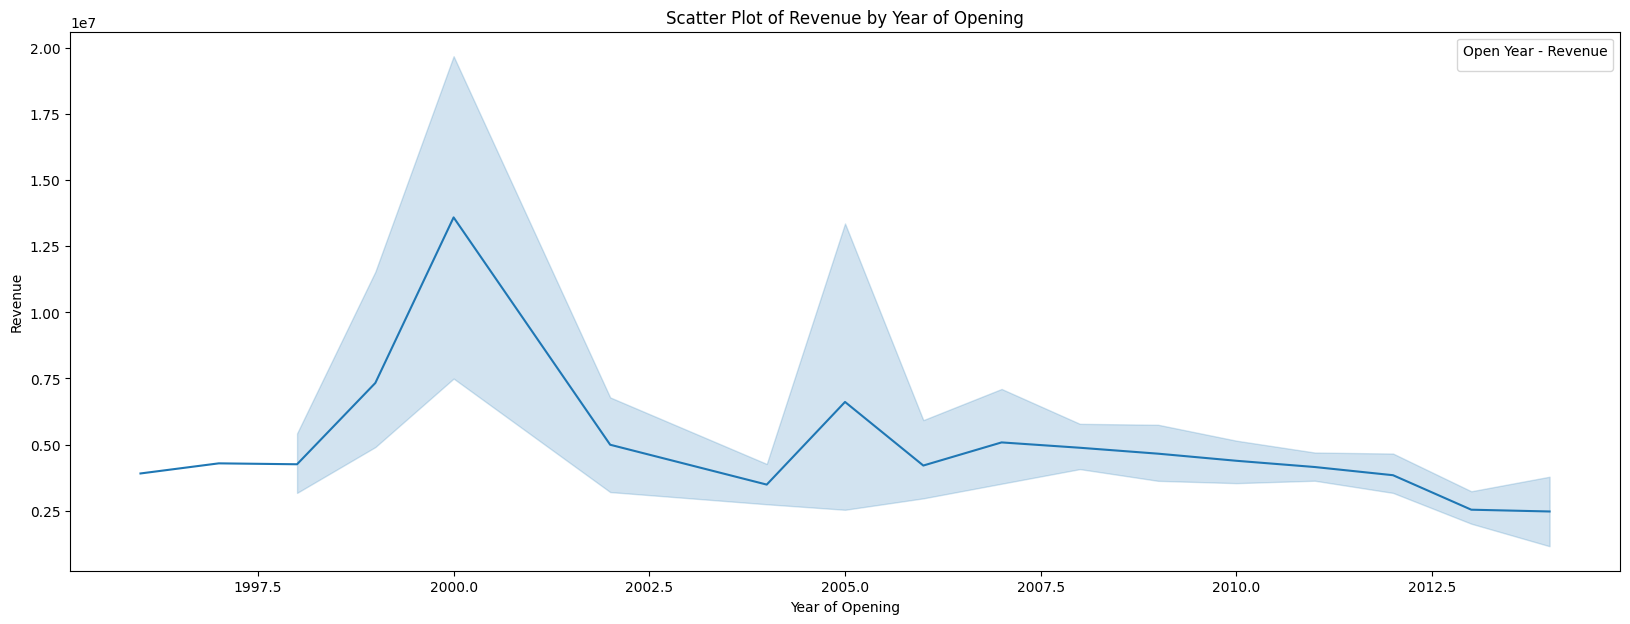

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include revenue data up to the year 2024
data_filtered = data3[data3['year'] <= 2024]

plt.figure(figsize=(20, 7)) 
sns.lineplot(x='year', y='Revenue', data=data_filtered)
plt.xlabel("Year of Opening")
plt.ylabel("Revenue")
plt.title("Scatter Plot of Revenue by Year of Opening")
plt.legend(title="Open Year - Revenue", loc="upper right")
plt.show()


In [51]:
revenue_sum = data3.iloc[:, -1].sum()

print("Sum of Revenue:", revenue_sum)

Sum of Revenue: 610133968


In [52]:
data4.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

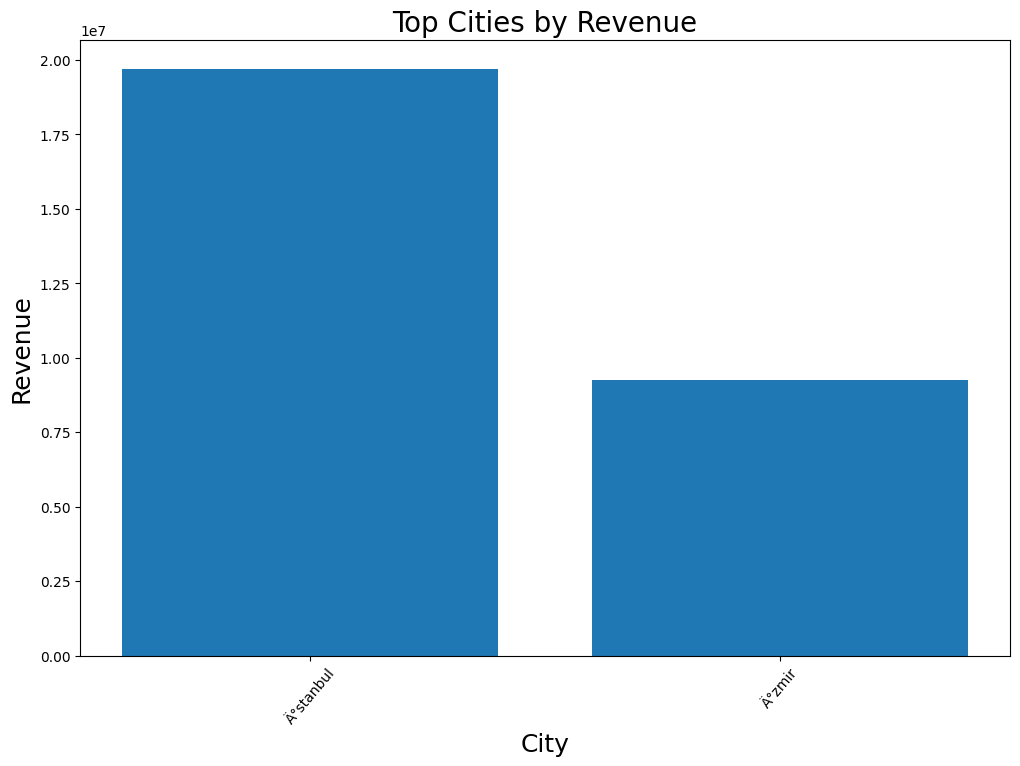

In [53]:
data_sorted = data4.sort_values(by='revenue', ascending=False)

# Select the top N cities with the highest revenue
top_cities = data_sorted.head(5)  # You can change the number as per your requirement

# Plotting
fig, axes = plt.subplots(figsize=(12, 8))
plt.bar(top_cities['City'], top_cities['revenue'])
plt.title("Top Cities by Revenue", fontsize=20)
plt.xlabel("City", fontsize=18)
plt.ylabel("Revenue", fontsize=18)
plt.xticks(rotation=50)
plt.show()

In [54]:
def detect_outliers_std(data4, threshold=3):
    mean = np.mean(data4)
    std = np.std(data4)
    outliers = (data4 - mean).abs() > threshold * std
    return outliers

outliers_std = detect_outliers_std(data1['revenue'])
print("Outliers using Standard Deviation method:", data4[outliers_std])


Outliers using Standard Deviation method:     Id   Open Date       City  City Group Type  P1   P2   P3   P4  P5  ...  \
16  16  01/07/2000  Ä°stanbul  Big Cities   FC   3  5.0  4.0  4.0   2  ...   
75  75  10/15/2005  Ä°stanbul  Big Cities   FC   5  5.0  4.0  5.0   1  ...   
99  99  12/18/1999  Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   

    P29  P30  P31  P32  P33  P34  P35  P36  P37     revenue  
16  2.0    0    0    0    0    0    0    0    0  19696939.0  
75  0.0    0    0    0    0    0    0    0    0  16549064.0  
99  1.0    5    5    4    2    5    5    5    3  13575224.0  

[3 rows x 43 columns]


In [55]:
data4.columns



Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [56]:
data4.drop('Open Date',axis=1,inplace=True)

In [57]:
data6=data5.copy()
data6.head()


Id   Open Date         City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012        Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009    Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

In [58]:
data5.drop('Open Date',axis=1,inplace=True)

In [59]:
data5.columns

Index(['Id', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Assuming your DataFrame is named 'T_data1'
label_encoder = LabelEncoder()

# Encode 'City Group' column
data5['City Group'] = label_encoder.fit_transform(data5['City Group'])

# One-hot encode 'City' and 'Type' columns
data5 = pd.get_dummies(data5, columns=['City', 'Type'], drop_first=True)

# Assuming T_datatest is your DataFrame
# Fill missing values with 0
data5 = data5.fillna(0)

# Convert all columns to integers (0 and 1)
data5 = data5.astype(int)

# Display the updated DataFrame
print(data5.head())


   Id  City Group  P1  P2  P3  P4  P5  P6  P7  P8  ...  City_Samsun  \
0   0           0   4   5   4   4   2   2   5   4  ...            0   
1   1           0   4   5   4   4   1   2   5   5  ...            0   
2   2           1   2   4   2   5   2   3   5   5  ...            0   
3   3           1   6   4   6   6   4   4  10   8  ...            0   
4   4           1   3   4   3   4   2   2   5   5  ...            0   

   City_TekirdaÄ  City_Tokat  City_Trabzon  City_UÅak  City_Ä°stanbul  \
0               0           0             0           0               1   
1               0           0             0           0               0   
2               0           0             0           0               0   
3               0           1             0           0               0   
4               0           0             0           0               0   

   City_Ä°zmir  City_ÅanlÄ±urfa  Type_FC  Type_IL  
0            0                 0        0        1  
1            0  

In [61]:
data5.head()

Id  City Group  P1  P2  P3  P4  P5  P6  P7  P8  ...  City_Samsun  \
0   0           0   4   5   4   4   2   2   5   4  ...            0   
1   1           0   4   5   4   4   1   2   5   5  ...            0   
2   2           1   2   4   2   5   2   3   5   5  ...            0   
3   3           1   6   4   6   6   4   4  10   8  ...            0   
4   4           1   3   4   3   4   2   2   5   5  ...            0   

   City_TekirdaÄ  City_Tokat  City_Trabzon  City_UÅak  City_Ä°stanbul  \
0               0           0             0           0               1   
1               0           0             0           0               0   
2               0           0             0           0               0   
3               0           1             0           0               0   
4               0           0             0           0               0   

   City_Ä°zmir  City_ÅanlÄ±urfa  Type_FC  Type_IL  
0            0                 0        0        1  
1            0                 0        1        0  
2            0                 0        0        1  
3            0                 0        0        1  
4            0                 0        0        1  

[5 rows x 75 columns]

In [62]:
import numpy as np

# Assuming your DataFrame is named df

# Apply log transformation to every feature except non-numeric and non-positive features
transformed_data_5 = data5.applymap(lambda x: np.log(x) if isinstance(x, (int, float)) and x > 0 else x)


C:\Users\Brijesh\AppData\Local\Temp\ipykernel_40864\260696017.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transformed_data_5 = data5.applymap(lambda x: np.log(x) if isinstance(x, (int, float)) and x > 0 else x)


In [63]:
data5.drop('Id',axis=1,inplace=True)


C:\Users\Brijesh\AppData\Local\Temp\ipykernel_40864\3907321368.py:7: UserWarning: Glyph 159 (\x9f) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent overlapping
C:\Users\Brijesh\AppData\Local\Temp\ipykernel_40864\3907321368.py:7: UserWarning: Glyph 158 (\x9e) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent overlapping
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


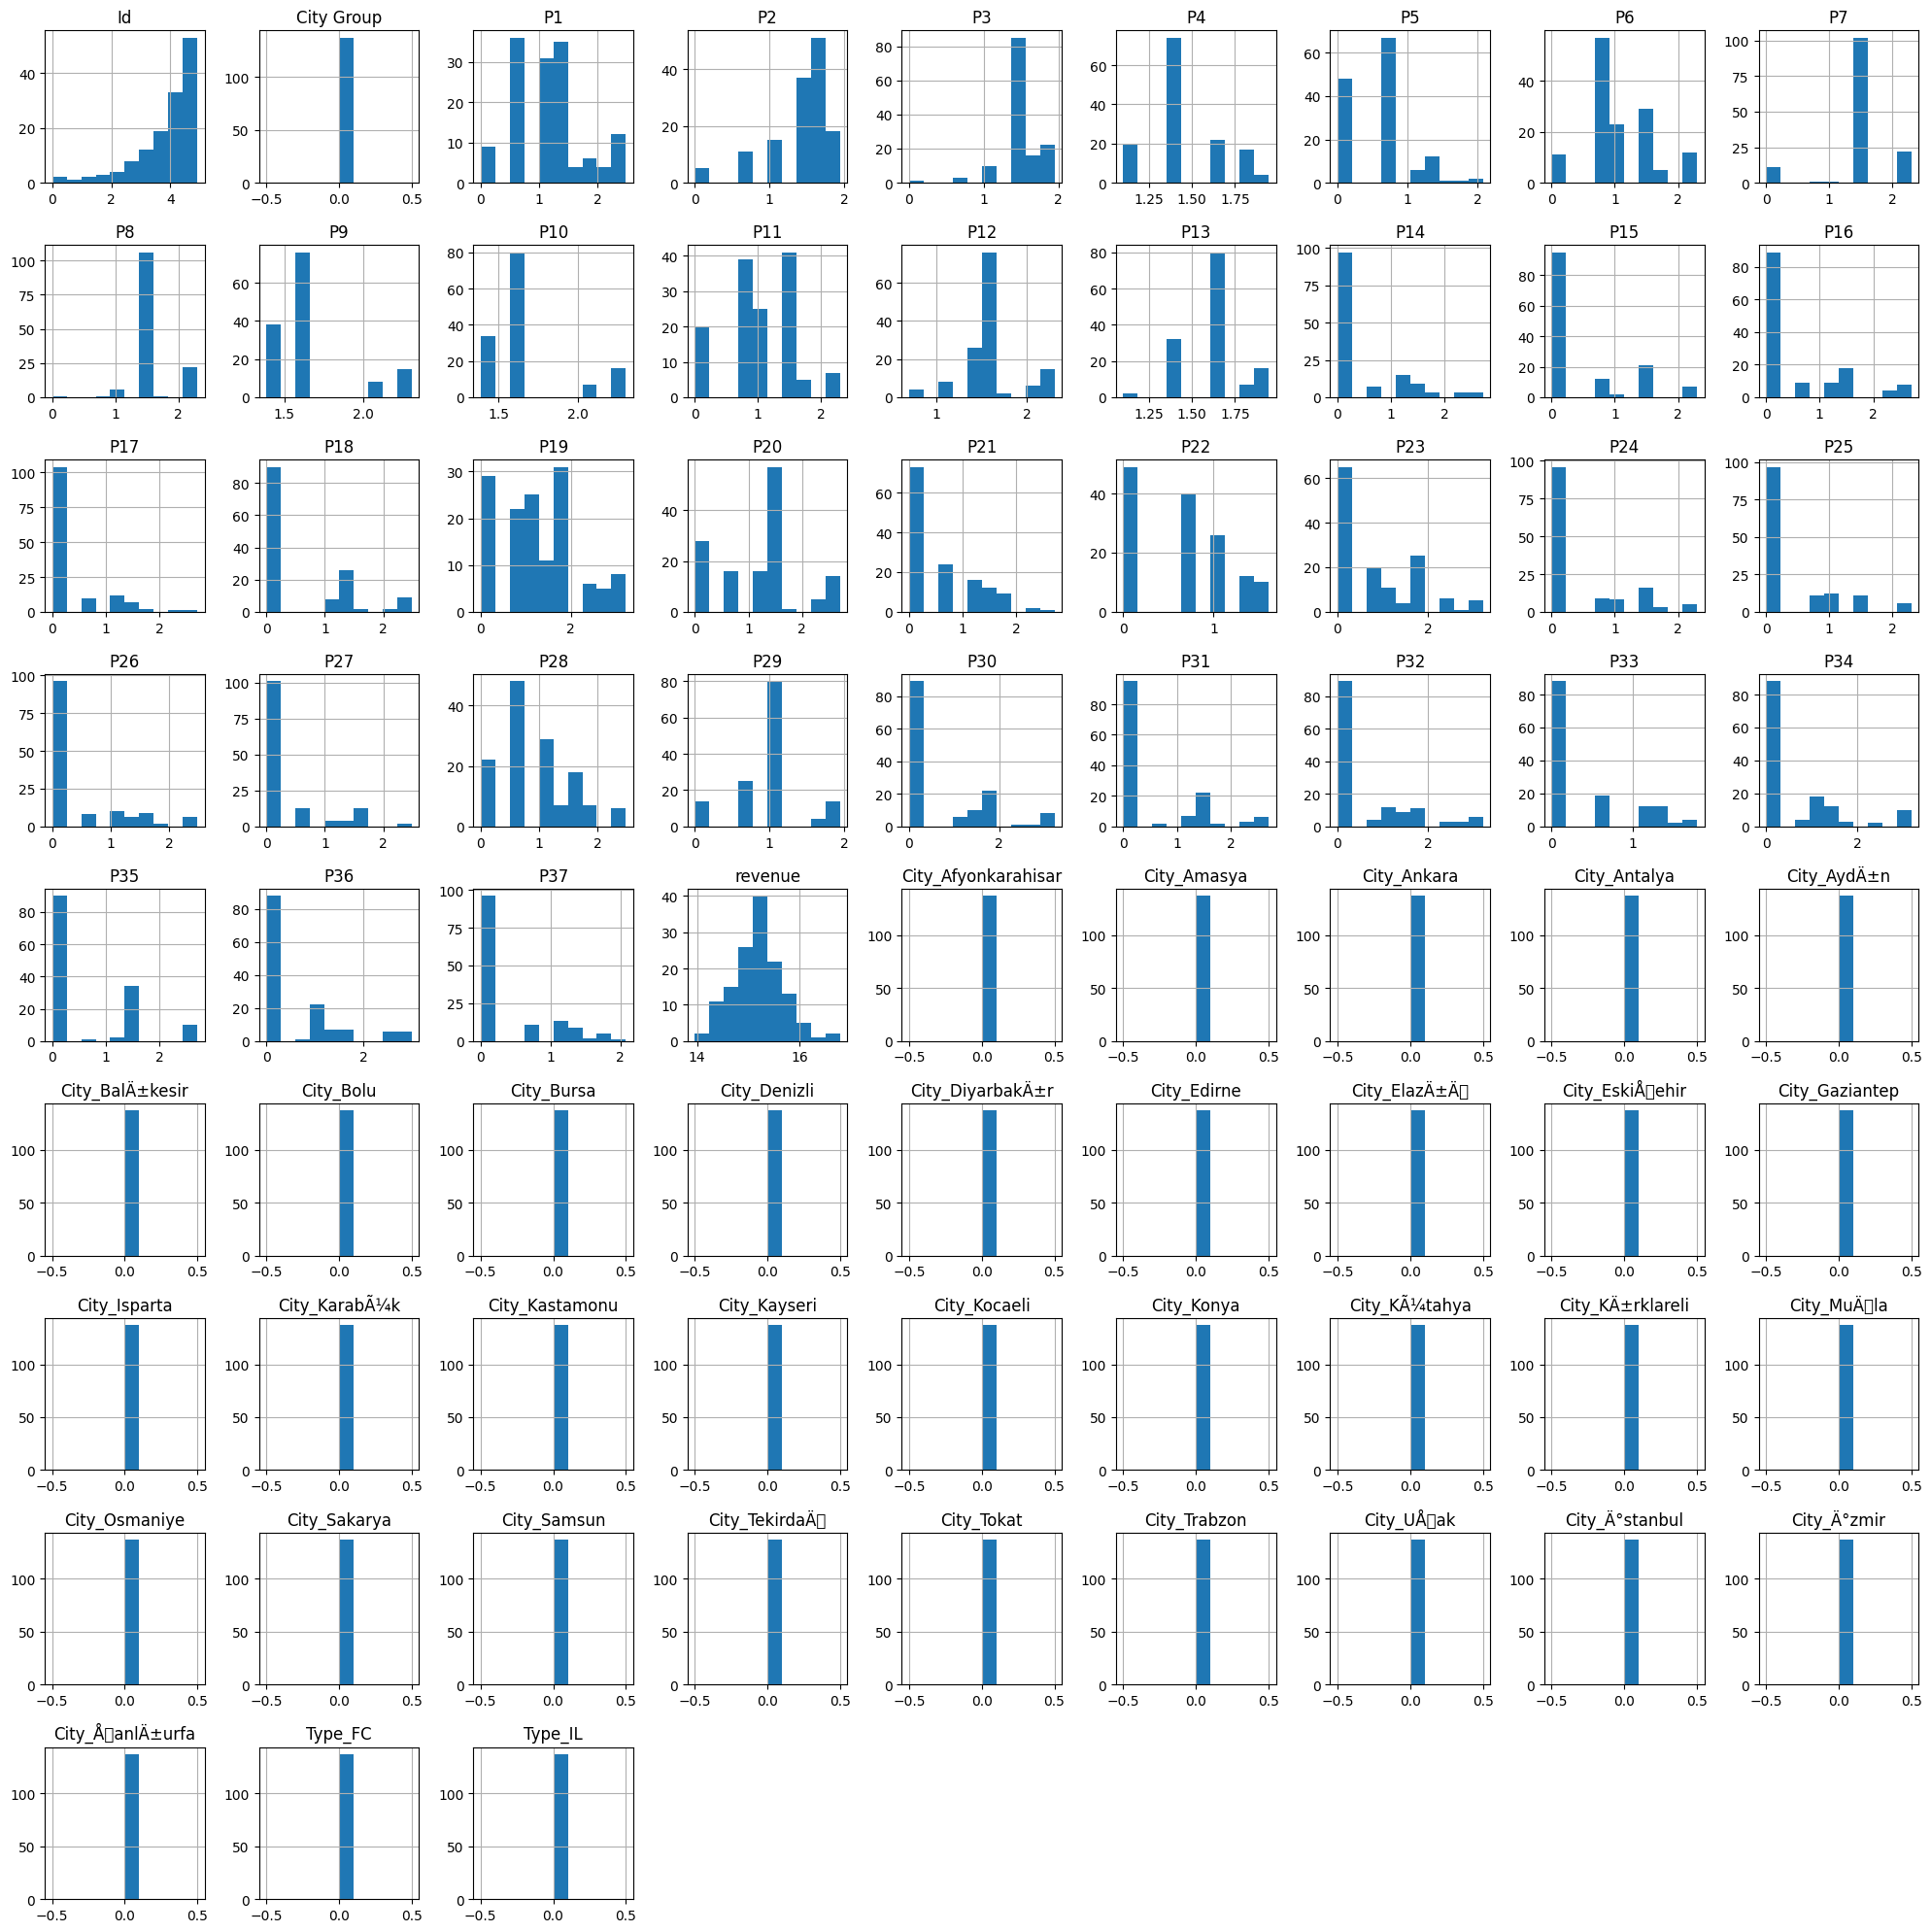

In [64]:
import pandas as pd

# Assuming your DataFrame is named df

# Plot histograms for all features
transformed_data_5.hist(figsize=(20, 20))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [65]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame 'T_data1' with your transformed features and target variable
# X is the feature matrix, and y is the target variable

# Exclude datetime columns if any
X = transformed_data_5.drop(['revenue'], axis=1)
y = transformed_data_5['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Display VIF values
vif_df = calculate_vif(X_train)
print(vif_df)


C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


            Variable        VIF
0                 Id  21.183419
1         City Group        NaN
2                 P1  62.100057
3                 P2  75.954608
4                 P3  85.512492
..               ...        ...
69    City_Ä°stanbul        NaN
70       City_Ä°zmir        NaN
71  City_ÅanlÄ±urfa        NaN
72           Type_FC        NaN
73           Type_IL        NaN

[74 rows x 2 columns]


In [66]:
import pandas as pd

# Assuming your DataFrame is named df

# Check for NaN values in the entire DataFrame
nan_values = transformed_data_5.isna().sum()

# Display the number of NaN values for each column
print("NaN values in each column:")
print(nan_values)

# Total number of NaN values in the DataFrame
total_nan = transformed_data_5.isna().sum().sum()
print("Total NaN values in the DataFrame:", total_nan)


NaN values in each column:
Id                  0
City Group          0
P1                  0
P2                  0
P3                  0
                   ..
City_Ä°stanbul      0
City_Ä°zmir         0
City_ÅanlÄ±urfa    0
Type_FC             0
Type_IL             0
Length: 75, dtype: int64
Total NaN values in the DataFrame: 0


In [67]:
transformed_data_5['City Group'].isna().sum()

0

In [68]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with your features and target variable
# X is the feature matrix, and y is the target variable

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Fit a linear regression model using Ordinary Least Squares (OLS)
model = sm.OLS(y_train, X_train).fit()

# Display the summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1.754
Date:                Tue, 27 Feb 2024   Prob (F-statistic):             0.0210
Time:                        13:29:33   Log-Likelihood:                -33.579
No. Observations:                 109   AIC:                             145.2
Df Residuals:                      70   BIC:                             250.1
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3481    

             Feature  Importance
0                 Id    0.166152
29               P28    0.153948
12               P11    0.119087
30               P29    0.066922
23               P22    0.063711
..               ...         ...
46        City_Bursa    0.000000
47      City_Denizli    0.000000
48  City_DiyarbakÄ±r    0.000000
50     City_ElazÄ±Ä    0.000000
73           Type_IL    0.000000

[74 rows x 2 columns]


C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


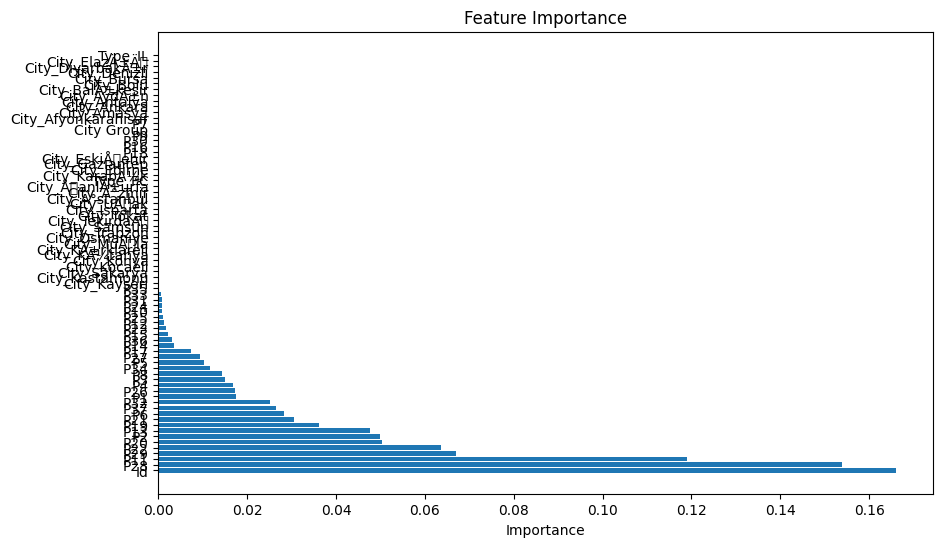

In [69]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Assuming X is your feature matrix and y is your target variable
# You may need to encode categorical variables and handle missing values

# Train a decision tree classifier
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [70]:
# Select the top 10 features
top_10_features = importance_df.head(10)['Feature']

# Convert top 10 features to a list
x_selected_features = top_10_features.tolist()

# Print the selected features
# Filter out columns that are not present in the DataFrame
x_selected_features = [col for col in x_selected_features if col in transformed_data_5.columns]

# Extract the data for the selected features
X_selected_data = transformed_data_5[x_selected_features]

# Print the selected features along with the data
print("Selected features with data:")
print(X_selected_data)


Selected features with data:
           Id       P28       P11       P29       P22       P20        P2  \
0    0.000000  0.693147  1.098612  1.098612  1.098612  1.386294  1.609438   
1    0.000000  1.098612  0.000000  1.098612  1.098612  0.693147  1.609438   
2    0.693147  0.000000  0.693147  1.098612  0.000000  0.000000  1.386294   
3    1.098612  0.693147  2.079442  1.945910  0.000000  2.484907  1.386294   
4    1.386294  0.000000  0.693147  1.098612  0.693147  0.693147  1.386294   
..        ...       ...       ...       ...       ...       ...       ...   
132  4.882802  0.693147  1.386294  1.098612  0.000000  1.098612  1.098612   
133  4.890349  1.098612  1.609438  1.098612  0.000000  0.693147  1.609438   
134  4.897840  0.693147  0.000000  1.098612  0.693147  1.098612  1.386294   
135  4.905275  1.098612  0.693147  1.098612  0.000000  0.000000  1.609438   
136  4.912655  1.098612  1.386294  1.098612  0.000000  0.000000  1.609438   

          P13       P19       P21  
0    1.609

C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.draw()
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


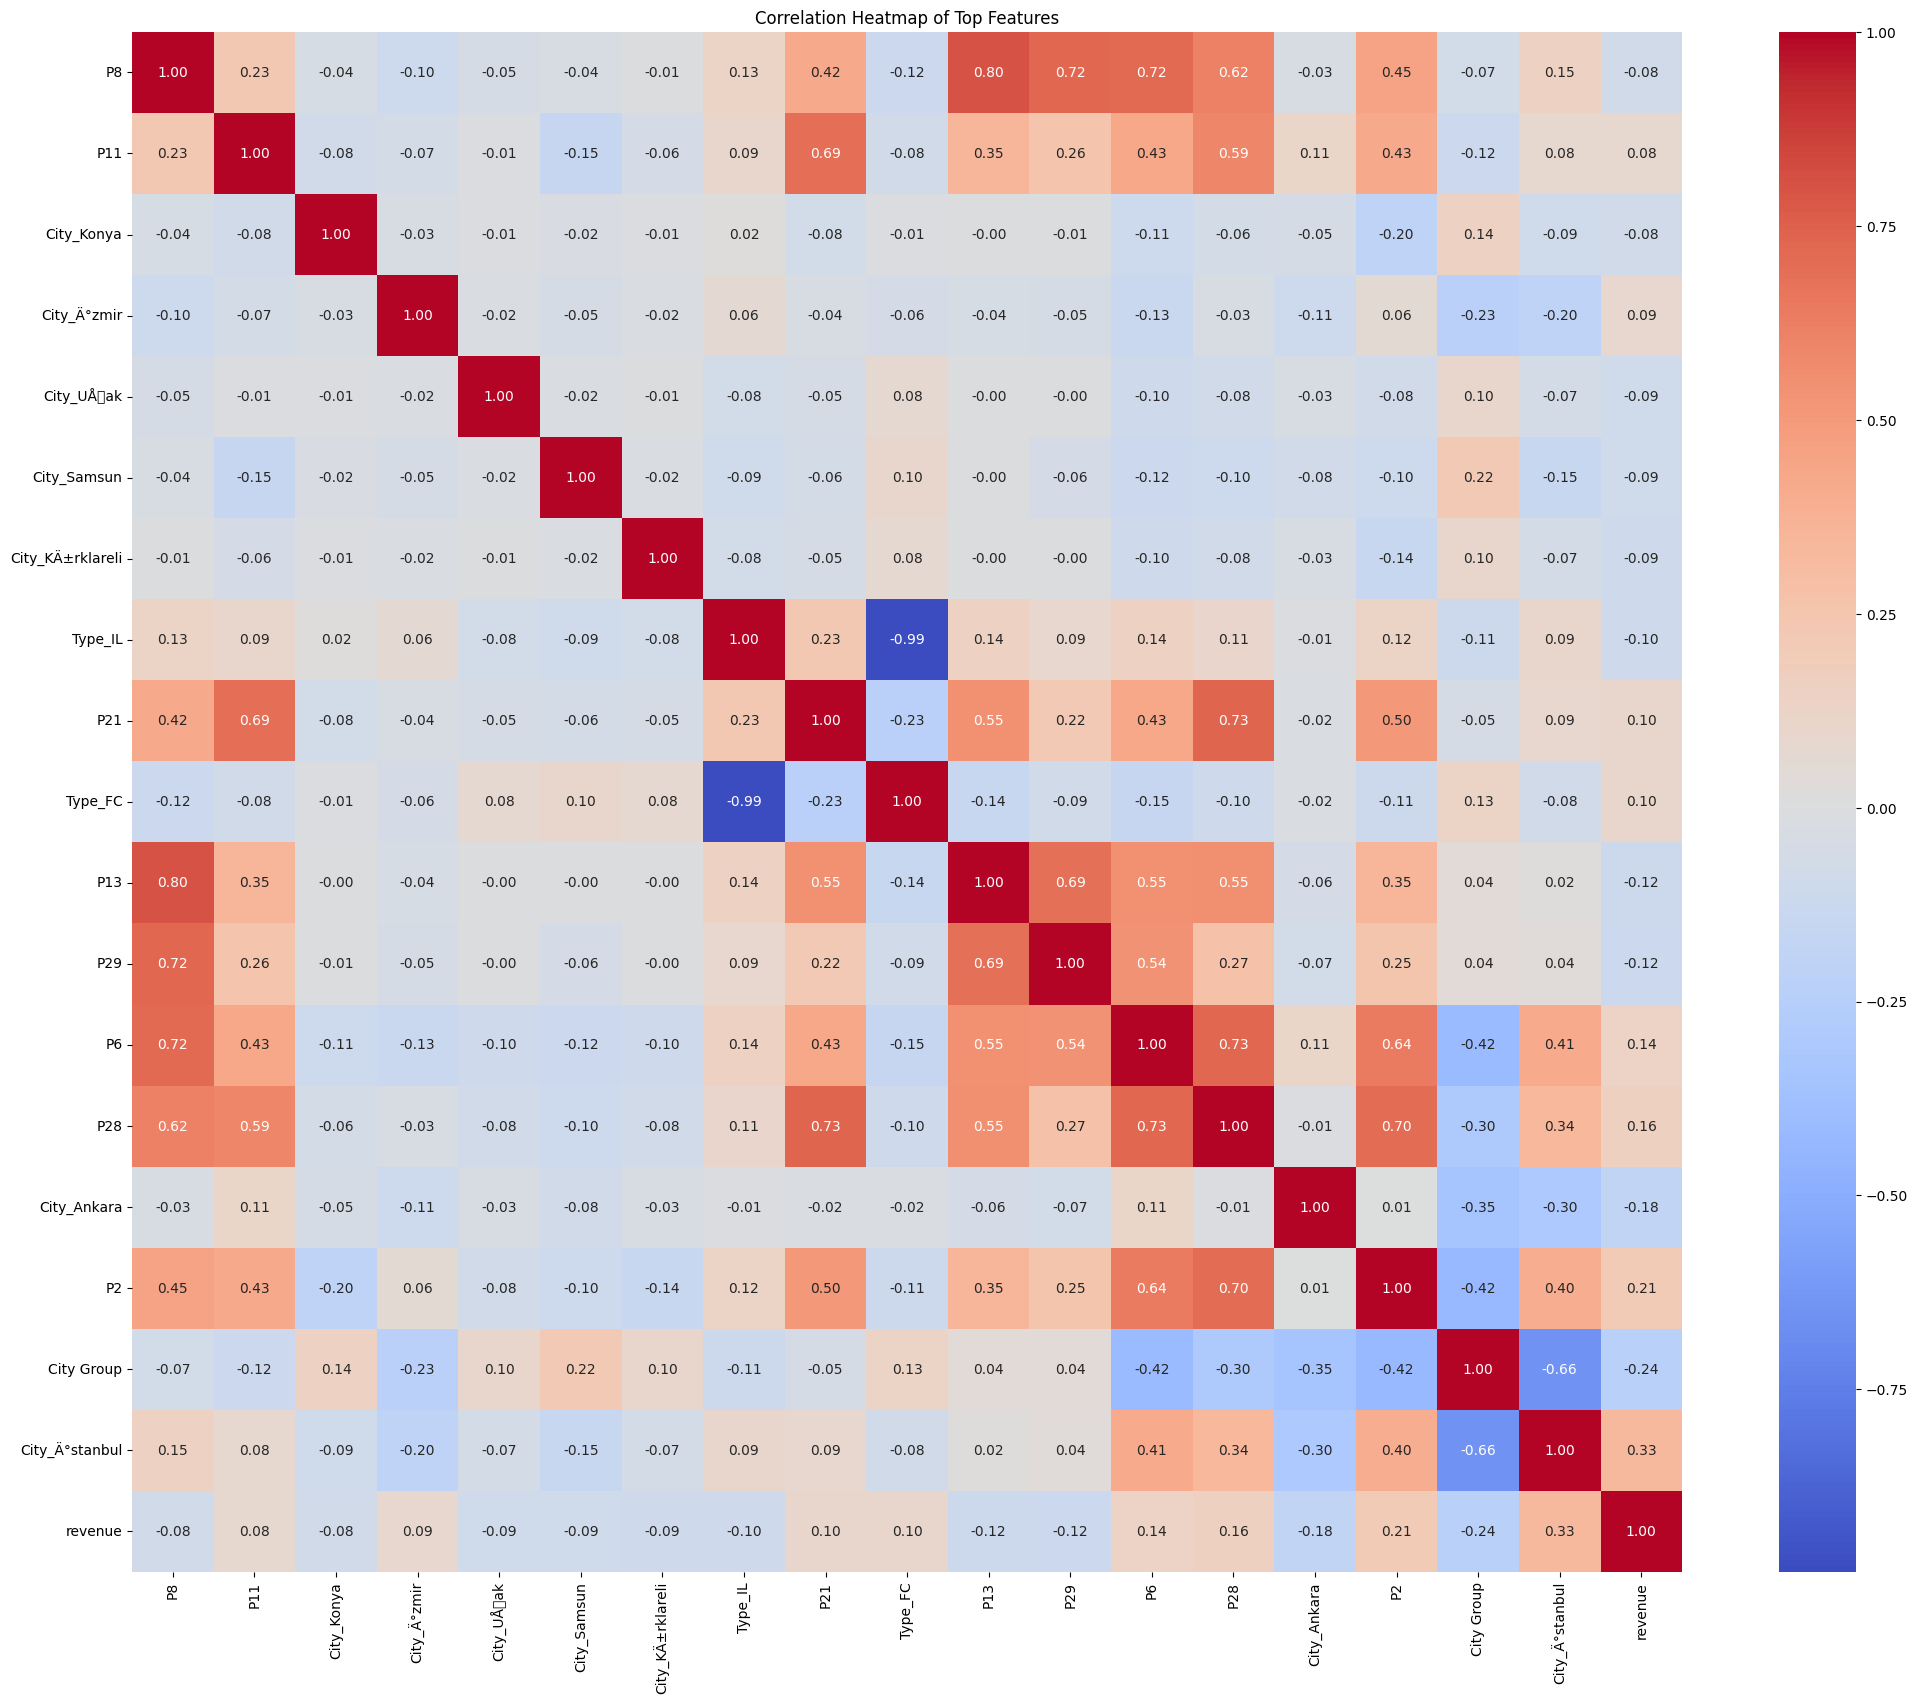

In [71]:
# Replace special characters in column names
transformed_data_5.columns = transformed_data_5.columns.str.replace('Ä±', 'i').str.replace('ÅŸ', 's').str.replace('ÄŸ', 'g').str.replace('Ä±', 'i').str.replace('ÅŸ', 's').str.replace('Å±', 'u')

# Continue with your code
numeric_columns = data5.select_dtypes(include=['number']).columns
corr = data5[numeric_columns].corr()["revenue"].abs()

# Rest of your code remains the same
sorted_corr = corr.sort_values()
num_to_drop = int(0.75 * len(data5.columns))


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already calculated and sorted the correlation coefficients
# sorted_corr = corr.sort_values()

# Specify the number of features to keep
num_to_keep = len(sorted_corr) - num_to_drop

# Select the top features based on correlation
top_features = sorted_corr.index[-num_to_keep:]

# Extract the relevant subset of the DataFrame
subset_df = data5[top_features]

# Calculate the correlation matrix for the subset
corr_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top Features')
plt.show()



In [72]:
X_selected_data

Id       P28       P11       P29       P22       P20        P2  \
0    0.000000  0.693147  1.098612  1.098612  1.098612  1.386294  1.609438   
1    0.000000  1.098612  0.000000  1.098612  1.098612  0.693147  1.609438   
2    0.693147  0.000000  0.693147  1.098612  0.000000  0.000000  1.386294   
3    1.098612  0.693147  2.079442  1.945910  0.000000  2.484907  1.386294   
4    1.386294  0.000000  0.693147  1.098612  0.693147  0.693147  1.386294   
..        ...       ...       ...       ...       ...       ...       ...   
132  4.882802  0.693147  1.386294  1.098612  0.000000  1.098612  1.098612   
133  4.890349  1.098612  1.609438  1.098612  0.000000  0.693147  1.609438   
134  4.897840  0.693147  0.000000  1.098612  0.693147  1.098612  1.386294   
135  4.905275  1.098612  0.693147  1.098612  0.000000  0.000000  1.609438   
136  4.912655  1.098612  1.386294  1.098612  0.000000  0.000000  1.609438   

          P13       P19       P21  
0    1.609438  1.609438  0.000000  
1    1.609438  1.098612  0.000000  
2    1.609438  0.000000  0.000000  
3    1.945910  2.995732  1.791759  
4    1.609438  0.693147  0.000000  
..        ...       ...       ...  
132  1.386294  1.386294  0.693147  
133  1.609438  1.098612  0.693147  
134  1.609438  0.693147  0.000000  
135  1.609438  0.000000  0.000000  
136  1.609438  0.693147  0.000000  

[137 rows x 10 columns]

In [73]:
subset_df

P8  P11  City_Konya  City_Ä°zmir  City_UÅak  City_Samsun  \
0     4    3           0            0           0            0   
1     5    1           0            0           0            0   
2     5    2           0            0           0            0   
3     8    8           0            0           0            0   
4     5    2           0            0           0            0   
..   ..  ...         ...          ...         ...          ...   
132   4    4           0            0           0            0   
133   4    5           0            1           0            0   
134   5    1           0            0           0            0   
135   5    2           0            0           0            0   
136   4    4           0            0           0            0   

     City_KÄ±rklareli  Type_IL  P21  Type_FC  P13  P29  P6  P28  City_Ankara  \
0                   0        1    1        0    5    3   2    2            0   
1                   0        0    1        1    5    3   2    3            1   
2                   0        1    1        0    5    3   3    1            0   
3                   0        1    6        0    7    7   4    2            0   
4                   0        1    1        0    5    3   2    1            0   
..                ...      ...  ...      ...  ...  ...  ..  ...          ...   
132                 0        0    2        1    4    3   2    2            0   
133                 0        0    2        1    5    3   3    3            0   
134                 0        0    1        1    5    3   3    2            0   
135                 0        0    1        1    5    3   2    3            0   
136                 0        0    1        1    5    3   2    3            0   

     P2  City Group  City_Ä°stanbul  revenue  
0     5           0               1  5653753  
1     5           0               0  6923131  
2     4           1               0  2055379  
3     4           1               0  2675511  
4     4           1               0  4316715  
..   ..         ...             ...      ...  
132   3           1               0  5787594  
133   5           0               0  9262754  
134   4           1               0  2544857  
135   5           0               1  7217634  
136   5           0               1  6363241  

[137 rows x 19 columns]

In [74]:
# Combine the two dataframes, ensuring no duplicates
combined_data = X_selected_data.join(subset_df, rsuffix='_subset')

# Print the combined data
print("Combined data:")
print(combined_data)




Combined data:
           Id       P28       P11       P29       P22       P20        P2  \
0    0.000000  0.693147  1.098612  1.098612  1.098612  1.386294  1.609438   
1    0.000000  1.098612  0.000000  1.098612  1.098612  0.693147  1.609438   
2    0.693147  0.000000  0.693147  1.098612  0.000000  0.000000  1.386294   
3    1.098612  0.693147  2.079442  1.945910  0.000000  2.484907  1.386294   
4    1.386294  0.000000  0.693147  1.098612  0.693147  0.693147  1.386294   
..        ...       ...       ...       ...       ...       ...       ...   
132  4.882802  0.693147  1.386294  1.098612  0.000000  1.098612  1.098612   
133  4.890349  1.098612  1.609438  1.098612  0.000000  0.693147  1.609438   
134  4.897840  0.693147  0.000000  1.098612  0.693147  1.098612  1.386294   
135  4.905275  1.098612  0.693147  1.098612  0.000000  0.000000  1.609438   
136  4.912655  1.098612  1.386294  1.098612  0.000000  0.000000  1.609438   

          P13       P19       P21  ...  Type_FC  P13_subset 

In [75]:
X = combined_data.drop("revenue",axis=1)
y = combined_data["revenue"]

In [76]:
pd.set_option('display.max_columns', None)

In [77]:
X.drop('P29_subset',axis=1, inplace=True)

In [78]:
y

0      5653753
1      6923131
2      2055379
3      2675511
4      4316715
        ...   
132    5787594
133    9262754
134    2544857
135    7217634
136    6363241
Name: revenue, Length: 137, dtype: int32

In [79]:
X = transformed_data_5.drop("revenue",axis=1)
y = transformed_data_5["revenue"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
import pandas as pd

# Assuming your DataFrame is named df

# Check for NaN values in the entire DataFrame
nan_values = X.isna().sum()

# Display the number of NaN values for each column
print("NaN values in each column:")
print(nan_values)

# Total number of NaN values in the DataFrame
total_nan = X.isna().sum().sum()
print("Total NaN values in the DataFrame:", total_nan)


NaN values in each column:
Id                 0
City Group         0
P1                 0
P2                 0
P3                 0
                  ..
City_Ä°stanbul     0
City_Ä°zmir        0
City_Åanliurfa    0
Type_FC            0
Type_IL            0
Length: 74, dtype: int64
Total NaN values in the DataFrame: 0


In [81]:
X_train

Id  City Group        P1        P2        P3        P4        P5  \
10   2.302585         0.0  2.197225  1.791759  1.791759  1.791759  1.386294   
130  4.867534         0.0  1.098612  1.386294  1.098612  1.386294  0.693147   
51   3.931826         0.0  0.693147  0.693147  1.386294  1.386294  0.693147   
11   2.397895         0.0  0.693147  1.386294  1.386294  1.386294  0.693147   
114  4.736198         0.0  1.386294  1.609438  1.609438  1.386294  0.693147   
..        ...         ...       ...       ...       ...       ...       ...   
71   4.262680         0.0  2.484907  1.945910  1.791759  1.791759  0.693147   
106  4.663439         0.0  1.098612  1.098612  1.791759  1.791759  1.386294   
14   2.639057         0.0  0.693147  0.693147  1.386294  1.386294  0.000000   
92   4.521789         0.0  2.484907  1.945910  1.945910  1.791759  0.693147   
102  4.624973         0.0  1.386294  1.609438  0.693147  1.609438  0.693147   

           P6        P7        P8        P9       P10       P11       P12  \
10   1.386294  2.302585  2.079442  2.302585  2.302585  2.079442  2.302585   
130  0.000000  1.609438  1.609438  1.609438  1.609438  0.693147  1.609438   
51   0.693147  1.386294  1.386294  1.609438  1.609438  1.386294  1.609438   
11   1.609438  1.609438  1.609438  1.609438  1.609438  0.693147  1.609438   
114  0.693147  1.609438  1.386294  1.609438  1.609438  1.098612  1.609438   
..        ...       ...       ...       ...       ...       ...       ...   
71   2.302585  2.302585  2.302585  2.302585  2.302585  1.386294  2.302585   
106  0.693147  0.693147  2.079442  2.302585  2.302585  1.791759  2.302585   
14   0.693147  1.609438  1.609438  1.609438  1.609438  0.693147  1.609438   
92   2.302585  2.302585  2.079442  2.079442  2.302585  2.079442  2.079442   
102  0.693147  1.609438  1.386294  1.386294  1.386294  1.098612  1.386294   

          P13       P14       P15       P16       P17       P18       P19  \
10   1.945910  0.000000  0.000000  0.000000  0.000000  0.000000  3.218876   
130  1.609438  0.000000  0.000000  0.000000  0.000000  0.000000  1.098612   
51   1.609438  0.000000  0.000000  0.000000  0.000000  0.000000  1.609438   
11   1.609438  0.693147  0.693147  1.609438  0.693147  1.386294  0.693147   
114  1.609438  1.098612  1.386294  1.098612  0.000000  1.098612  1.609438   
..        ...       ...       ...       ...       ...       ...       ...   
71   1.945910  2.197225  2.079442  2.484907  1.098612  2.484907  2.302585   
106  1.945910  0.000000  0.000000  0.000000  0.000000  0.000000  1.609438   
14   1.609438  0.000000  0.000000  0.000000  0.000000  0.000000  1.098612   
92   1.945910  0.000000  0.000000  0.000000  0.000000  0.000000  3.218876   
102  1.386294  0.000000  0.000000  0.000000  0.000000  0.000000  1.386294   

          P20       P21       P22       P23       P24       P25       P26  \
10   2.708050  2.708050  1.098612  2.995732  0.000000  0.000000  0.000000   
130  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
51   1.386294  0.693147  0.000000  0.693147  0.000000  0.000000  0.000000   
11   1.609438  0.000000  0.000000  1.098612  1.609438  0.693147  1.098612   
114  1.609438  1.386294  1.609438  1.609438  1.098612  1.098612  1.098612   
..        ...       ...       ...       ...       ...       ...       ...   
71   2.197225  1.791759  1.098612  1.609438  2.079442  2.079442  2.302585   
106  1.098612  1.098612  0.000000  1.609438  0.000000  0.000000  0.000000   
14   1.098612  0.000000  1.098612  0.693147  0.000000  0.000000  0.000000   
92   2.708050  1.791759  1.098612  3.218876  0.000000  0.000000  0.000000   
102  1.386294  0.000000  0.693147  1.098612  0.000000  0.000000  0.000000   

          P27       P28       P29       P30       P31       P32       P33  \
10   0.000000  2.302585  0.693147  0.000000  0.000000  0.000000  0.000000   
130  0.000000  0.693147  1.098612  0.000000  0.000000  0.000000  0.000000   
51   0.000000  0.000000  1.098612  0.000000  0.000000  0

In [82]:
y_train

10     15.135968
130    15.032245
51     15.001230
11     15.456713
114    15.239928
         ...    
71     15.235342
106    15.402452
14     14.508206
92     15.729845
102    14.822757
Name: revenue, Length: 109, dtype: float64

In [83]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with your features and target variable
# X is the feature matrix, and y is the target variable

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Fit a linear regression model using Ordinary Least Squares (OLS)
model = sm.OLS(y_train, X_train).fit()

# Display the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1.754
Date:                Tue, 27 Feb 2024   Prob (F-statistic):             0.0210
Time:                        13:29:51   Log-Likelihood:                -33.579
No. Observations:                 109   AIC:                             145.2
Df Residuals:                      70   BIC:                             250.1
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3481    

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Display VIF values
vif_df = calculate_vif(X_train)
print(vif_df)

C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


           Variable         VIF
0             const  645.971831
1                Id    1.474237
2        City Group         NaN
3                P1   14.074546
4                P2    6.401215
..              ...         ...
70   City_Ä°stanbul         NaN
71      City_Ä°zmir         NaN
72  City_Åanliurfa         NaN
73          Type_FC         NaN
74          Type_IL         NaN

[75 rows x 2 columns]


In [85]:
test=pd.read_csv("test.csv",encoding='unicode_escape')

In [86]:
test.head()

Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  P6  \
0   0  01/22/2011          NiÄde       Other   FC   1  4.0  4.0  4.0   1   2   
1   1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   2   2   
2   2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   2   
3   3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   3   
4   4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   2   

   P7  P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  \
0   5   4   5    5    5    3  4.0    0    0    0    2    0    5    5    3   
1   5   3   4    4    2    4  5.0    0    0    0    0    0    5    5    3   
2   5   4   4    5    4    5  5.0    0    0    0    0    0    5    5    5   
3   5   4   5    4    3    4  5.0    0    0    0    0    4    4    4    3   
4   5   4   5    4    3    5  4.0    0    0    0    0    0    1    5    3   

   P22  P23  P24  P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  \
0    1    4    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0   
1    2    1    0    0  0.0  0.0  1.0  3.0    0    0    0    0    0    0    0   
2    5    5    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0   
3    2    2    0    0  0.0  0.0  2.0  3.0    0    4    0    0    0    0    0   
4    1    1    0    0  0.0  0.0  5.0  3.0    0    0    0    0    0    0    0   

   P37  
0    0  
1    0  
2    0  
3    0  
4    0

In [87]:
test1=test.copy()

In [88]:
test.shape
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [89]:
test.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [90]:
test.drop("Id",axis=1,inplace = True)

In [91]:
test['Open Date'] = pd.to_datetime(test['Open Date'])
test['year'] = test['Open Date'].apply(lambda x:x.year)
test['month'] = test['Open Date'].apply(lambda x:x.month)
test['day'] = test['Open Date'].apply(lambda x:x.day)

In [92]:
test = test.drop("Open Date", axis=1)
test.head(5)

City  City Group Type  P1   P2   P3   P4  P5  P6  P7  P8  P9  \
0          NiÄde       Other   FC   1  4.0  4.0  4.0   1   2   5   4   5   
1           Konya       Other   IL   3  4.0  4.0  4.0   2   2   5   3   4   
2          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   2   5   4   4   
3         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   3   5   4   5   
4  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   2   5   4   5   

   P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  \
0    5    5    3  4.0    0    0    0    2    0    5    5    3    1    4    0   
1    4    2    4  5.0    0    0    0    0    0    5    5    3    2    1    0   
2    5    4    5  5.0    0    0    0    0    0    5    5    5    5    5    0   
3    4    3    4  5.0    0    0    0    0    4    4    4    3    2    2    0   
4    4    3    5  4.0    0    0    0    0    0    1    5    3    1    1    0   

   P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  year  \
0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0    0  2011   
1    0  0.0  0.0  1.0  3.0    0    0    0    0    0    0    0    0  2011   
2    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0    0  2013   
3    0  0.0  0.0  2.0  3.0    0    4    0    0    0    0    0    0  2013   
4    0  0.0  0.0  5.0  3.0    0    0    0    0    0    0    0    0  2013   

   month  day  
0      1   22  
1      3   18  
2     10   30  
3      5    6  
4      7   31

In [93]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Assuming your DataFrame is named 'T_data1'
label_encoder = LabelEncoder()

# Encode 'City Group' column
test['City Group'] = label_encoder.fit_transform(test['City Group'])

# One-hot encode 'City' and 'Type' columns
test = pd.get_dummies(test, columns=['City', 'Type'], drop_first=True)

# Assuming T_datatest is your DataFrame
# Fill missing values with 0
test = test.fillna(0)

# Convert boolean columns to integers (0 and 1)
test = test.astype(int)

# Display the updated DataFrame
print(test.head())

   City Group  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  \
0           1   1   4   4   4   1   2   5   4   5    5    5    3    4    0   
1           1   3   4   4   4   2   2   5   3   4    4    2    4    5    0   
2           0   3   4   4   4   2   2   5   4   4    5    4    5    5    0   
3           1   2   4   4   4   2   3   5   4   5    4    3    4    5    0   
4           1   2   4   4   4   1   2   5   4   5    4    3    5    4    0   

   P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  P28  P29  \
0    0    0    2    0    5    5    3    1    4    0    0    0    0    2    3   
1    0    0    0    0    5    5    3    2    1    0    0    0    0    1    3   
2    0    0    0    0    5    5    5    5    5    0    0    0    0    2    3   
3    0    0    0    4    4    4    3    2    2    0    0    0    0    2    3   
4    0    0    0    0    1    5    3    1    1    0    0    0    0    5    3   

   P30  P31  P32  P33  P34  P35  P36  P37  year  m

In [94]:
test

City Group  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  \
0               1   1   4   4   4   1   2   5   4   5    5    5    3    4   
1               1   3   4   4   4   2   2   5   3   4    4    2    4    5   
2               0   3   4   4   4   2   2   5   4   4    5    4    5    5   
3               1   2   4   4   4   2   3   5   4   5    4    3    4    5   
4               1   2   4   4   4   1   2   5   4   5    4    3    5    4   
...           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...   
99995           1   5   5   4   4   2   2   5   5   4    4    4    4    4   
99996           1   1   2   4   3   1   1   1   5   5    5    2    4    5   
99997           0   4   5   4   4   1   2   5   3   4    5    5    4    5   
99998           0  12   7   6   6   4   4  10  10  10   10    6   10    7   
99999           0   2   5   4   4   2   2   5   5   5    4    4    4    5   

       P14  P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  \
0        0    0    0    2    0    5    5    3    1    4    0    0    0    0   
1        0    0    0    0    0    5    5    3    2    1    0    0    0    0   
2        0    0    0    0    0    5    5    5    5    5    0    0    0    0   
3        0    0    0    0    4    4    4    3    2    2    0    0    0    0   
4        0    0    0    0    0    1    5    3    1    1    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995    0    0    0    0    0    3    1    1    3    2    0    0    0    0   
99996    0    0    0    1    0    1    1    1    1    2    0    0    0    0   
99997    0    4    4    3    3    3    5    4    5    5    4    4    4    3   
99998    0    0    0    0    0   20    9    3    3   15    0    2    0    0   
99999    5    0    0    1    1    5    4    1    2    1    5    0    0    1   

       P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  year  month  day  \
0        2    3    0    0    0    0    0    0    0    0  2011      1   22   
1        1    3    0    0    0    0    0    0    0    0  2011      3   18   
2        2    3    0    0    0    0    0    0    0    0  2013     10   30   
3        2    3    0    4    0    0    0    0    0    0  2013      5    6   
4        5    3    0    0    0    0    0    0    0    0  2013      7   31   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...    ...  ...   
99995    2    3    0    0    0    0    0    0    0    0  2000      1    5   
99996    1    3    5    0    0    0    4    0    0    0  2011      7   18   
99997    4    1    5    5    3    2    4    4    4    2  2012     12   29   
99998    7    5    0    0    0    4    0    0    0    0  2013     10   12   
99999    5    3    0    2    0    2    2    4    2    0  2010     10    5   

       City_Afyonkarahisar  City_Aksaray  City_Ankara  City_Antalya  \
0                        0             0            0             0   
1                        0             0            0             0   
2                        0             0            1             0   
3                        0             0            0             0   
4                        1             0            0             0   
...                    ...           ...          ...           ...   
99995                    0             0            0             1   
99996                    0             0            0             0   
99997                    0             0            0             0   
99998                    0             0            0             0   
99999                    0             0            0             0   

       City_Artvin  City_AydÄ±n  City_BalÄ±kesir  City_Batman  City_Bilecik  \
0                0            0                0            0             0   
1                0            0                0            0             0   
2                0            0                0            0             0   
3                0            0        

In [95]:
test.drop("City_Trabzon",axis=1,inplace = True)

In [96]:
test.drop("City_Bolu",axis=1,inplace = True)

In [97]:
test.drop("City_Konya",axis=1,inplace = True)

In [98]:
X_train

const        Id  City Group        P1        P2        P3        P4  \
10     1.0  2.302585         0.0  2.197225  1.791759  1.791759  1.791759   
130    1.0  4.867534         0.0  1.098612  1.386294  1.098612  1.386294   
51     1.0  3.931826         0.0  0.693147  0.693147  1.386294  1.386294   
11     1.0  2.397895         0.0  0.693147  1.386294  1.386294  1.386294   
114    1.0  4.736198         0.0  1.386294  1.609438  1.609438  1.386294   
..     ...       ...         ...       ...       ...       ...       ...   
71     1.0  4.262680         0.0  2.484907  1.945910  1.791759  1.791759   
106    1.0  4.663439         0.0  1.098612  1.098612  1.791759  1.791759   
14     1.0  2.639057         0.0  0.693147  0.693147  1.386294  1.386294   
92     1.0  4.521789         0.0  2.484907  1.945910  1.945910  1.791759   
102    1.0  4.624973         0.0  1.386294  1.609438  0.693147  1.609438   

           P5        P6        P7        P8        P9       P10       P11  \
10   1.386294  1.386294  2.302585  2.079442  2.302585  2.302585  2.079442   
130  0.693147  0.000000  1.609438  1.609438  1.609438  1.609438  0.693147   
51   0.693147  0.693147  1.386294  1.386294  1.609438  1.609438  1.386294   
11   0.693147  1.609438  1.609438  1.609438  1.609438  1.609438  0.693147   
114  0.693147  0.693147  1.609438  1.386294  1.609438  1.609438  1.098612   
..        ...       ...       ...       ...       ...       ...       ...   
71   0.693147  2.302585  2.302585  2.302585  2.302585  2.302585  1.386294   
106  1.386294  0.693147  0.693147  2.079442  2.302585  2.302585  1.791759   
14   0.000000  0.693147  1.609438  1.609438  1.609438  1.609438  0.693147   
92   0.693147  2.302585  2.302585  2.079442  2.079442  2.302585  2.079442   
102  0.693147  0.693147  1.609438  1.386294  1.386294  1.386294  1.098612   

          P12       P13       P14       P15       P16       P17       P18  \
10   2.302585  1.945910  0.000000  0.000000  0.000000  0.000000  0.000000   
130  1.609438  1.609438  0.000000  0.000000  0.000000  0.000000  0.000000   
51   1.609438  1.609438  0.000000  0.000000  0.000000  0.000000  0.000000   
11   1.609438  1.609438  0.693147  0.693147  1.609438  0.693147  1.386294   
114  1.609438  1.609438  1.098612  1.386294  1.098612  0.000000  1.098612   
..        ...       ...       ...       ...       ...       ...       ...   
71   2.302585  1.945910  2.197225  2.079442  2.484907  1.098612  2.484907   
106  2.302585  1.945910  0.000000  0.000000  0.000000  0.000000  0.000000   
14   1.609438  1.609438  0.000000  0.000000  0.000000  0.000000  0.000000   
92   2.079442  1.945910  0.000000  0.000000  0.000000  0.000000  0.000000   
102  1.386294  1.386294  0.000000  0.000000  0.000000  0.000000  0.000000   

          P19       P20       P21       P22       P23       P24       P25  \
10   3.218876  2.708050  2.708050  1.098612  2.995732  0.000000  0.000000   
130  1.098612  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
51   1.609438  1.386294  0.693147  0.000000  0.693147  0.000000  0.000000   
11   0.693147  1.609438  0.000000  0.000000  1.098612  1.609438  0.693147   
114  1.609438  1.609438  1.386294  1.609438  1.609438  1.098612  1.098612   
..        ...       ...       ...       ...       ...       ...       ...   
71   2.302585  2.197225  1.791759  1.098612  1.609438  2.079442  2.079442   
106  1.609438  1.098612  1.098612  0.000000  1.609438  0.000000  0.000000   
14   1.098612  1.098612  0.000000  1.098612  0.693147  0.000000  0.000000   
92   3.218876  2.708050  1.791759  1.098612  3.218876  0.000000  0.000000   
102  1.386294  1.386294  0.000000  0.693147  1.098612  0.000000  0.000000   

          P26       P27       P28       P29       P30       P31       P32  \
10   0.000000  0.000000  2.302585  0.693147  0.000000  0.000000  0.000000   
130  0.000000  0.000000  0.693147  1.098612  0.000000  0.000000  0.000000   
51   0.000000  0.000000  0.000000  1.098612  0.000000  0.000000  0.000000   
11   1.09

In [99]:
X_test

Id  City Group        P1        P2        P3        P4        P5  \
105  4.653960         0.0  0.000000  0.693147  1.609438  1.098612  0.000000   
104  4.644391         0.0  1.386294  1.609438  1.386294  1.098612  0.000000   
12   2.484907         0.0  0.693147  0.693147  1.386294  1.386294  0.693147   
26   3.258097         0.0  1.098612  1.609438  1.386294  1.609438  0.693147   
123  4.812184         0.0  0.000000  0.000000  1.386294  1.098612  0.000000   
66   4.189655         0.0  0.693147  0.693147  1.386294  1.098612  0.000000   
64   4.158883         0.0  2.484907  1.945910  1.791759  1.791759  0.693147   
115  4.744932         0.0  1.791759  1.386294  1.791759  1.791759  1.386294   
133  4.890349         0.0  1.386294  1.609438  1.386294  1.386294  0.693147   
85   4.442651         0.0  1.098612  1.609438  1.386294  1.386294  0.693147   
84   4.430817         0.0  1.386294  1.386294  1.609438  1.098612  0.000000   
45   3.806662         0.0  1.791759  1.791759  1.791759  1.386294  0.693147   
69   4.234107         0.0  0.693147  0.693147  1.386294  1.609438  1.386294   
67   4.204693         0.0  1.386294  1.609438  1.386294  1.609438  0.693147   
31   3.433987         0.0  1.386294  1.609438  1.386294  1.386294  0.000000   
42   3.737670         0.0  2.484907  1.945910  1.791759  1.791759  1.386294   
27   3.295837         0.0  1.386294  1.609438  1.386294  1.098612  0.000000   
19   2.944439         0.0  0.693147  1.386294  1.386294  1.386294  0.693147   
132  4.882802         0.0  0.693147  1.098612  1.098612  1.609438  1.386294   
56   4.025352         0.0  1.386294  1.609438  1.386294  1.386294  0.693147   
125  4.828314         0.0  2.197225  1.791759  1.791759  1.791759  1.386294   
4    1.386294         0.0  1.098612  1.386294  1.098612  1.386294  0.693147   
109  4.691348         0.0  0.693147  1.386294  1.098612  1.609438  1.386294   
36   3.583519         0.0  1.098612  1.609438  1.609438  1.098612  0.000000   
89   4.488636         0.0  0.000000  0.000000  1.386294  1.098612  0.000000   
100  4.605170         0.0  1.098612  1.609438  1.386294  1.386294  0.693147   
16   2.772589         0.0  1.098612  1.609438  1.386294  1.386294  0.693147   
18   2.890372         0.0  1.386294  1.609438  1.386294  1.098612  0.000000   

           P6        P7        P8        P9       P10       P11       P12  \
105  0.693147  0.000000  1.609438  1.609438  1.609438  0.000000  1.609438   
104  1.098612  1.609438  1.609438  1.609438  1.609438  0.693147  1.609438   
12   0.000000  1.609438  1.386294  1.609438  1.609438  1.098612  1.609438   
26   1.098612  1.609438  1.098612  1.609438  1.386294  1.609438  1.609438   
123  0.000000  0.000000  1.386294  1.609438  1.609438  1.098612  1.609438   
66   0.000000  0.000000  1.386294  1.609438  1.609438  1.098612  1.609438   
64   2.079442  2.302585  2.302585  2.302585  2.302585  1.386294  2.302585   
115  2.079442  2.302585  2.302585  2.302585  2.302585  1.386294  2.302585   
133  1.098612  1.609438  1.386294  1.386294  1.609438  1.609438  1.386294   
85   1.609438  1.609438  1.386294  1.609438  1.386294  1.098612  1.609438   
84   1.098612  1.609438  1.609438  1.609438  1.609438  0.693147  1.609438   
45   2.079442  2.302585  2.302585  2.302585  2.079442  1.386294  2.302585   
69   0.693147  1.609438  1.609438  1.609438  1.609438  0.000000  1.609438   
67   1.386294  1.609438  1.386294  1.386294  1.386294  1.098612  1.098612   
31   1.098612  1.609438  1.609438  1.609438  1.609438  0.693147  1.609438   
42   1.386294  2.302585  2.079442  2.302585  2.302585  1.791759  2.302585   
27   0.693147  1.609438  1.386294  1.386294  1.609438  1.386294  1.386294   
19   0.693147  1.609438  1.609438  1.386294  1.386294  0.000000  1.098612   
132  0.693147  1.386294  1.386294  1.386294  1.386294  1.386294  1.386294   
56   0.693147  1.609438  1.386294  1.386294  1.386294  1.609438  1.098612   
125  1.791759  2.302585  1.791759  2.079442  2.302585  2.302585  2.079442   
4    0.693147  1.609438  

In [100]:
test.drop("City_Gaziantep",axis=1,inplace = True)

In [101]:
test.head()

City Group  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  \
0           1   1   4   4   4   1   2   5   4   5    5    5    3    4    0   
1           1   3   4   4   4   2   2   5   3   4    4    2    4    5    0   
2           0   3   4   4   4   2   2   5   4   4    5    4    5    5    0   
3           1   2   4   4   4   2   3   5   4   5    4    3    4    5    0   
4           1   2   4   4   4   1   2   5   4   5    4    3    5    4    0   

   P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  P28  P29  \
0    0    0    2    0    5    5    3    1    4    0    0    0    0    2    3   
1    0    0    0    0    5    5    3    2    1    0    0    0    0    1    3   
2    0    0    0    0    5    5    5    5    5    0    0    0    0    2    3   
3    0    0    0    4    4    4    3    2    2    0    0    0    0    2    3   
4    0    0    0    0    1    5    3    1    1    0    0    0    0    5    3   

   P30  P31  P32  P33  P34  P35  P36  P37  year  month  day  \
0    0    0    0    0    0    0    0    0  2011      1   22   
1    0    0    0    0    0    0    0    0  2011      3   18   
2    0    0    0    0    0    0    0    0  2013     10   30   
3    0    4    0    0    0    0    0    0  2013      5    6   
4    0    0    0    0    0    0    0    0  2013      7   31   

   City_Afyonkarahisar  City_Aksaray  City_Ankara  City_Antalya  City_Artvin  \
0                    0             0            0             0            0   
1                    0             0            0             0            0   
2                    0             0            1             0            0   
3                    0             0            0             0            0   
4                    1             0            0             0            0   

   City_AydÄ±n  City_BalÄ±kesir  City_Batman  City_Bilecik  City_Bursa  \
0            0                0            0             0           0   
1            0                0            0             0           0   
2            0                0            0             0           0   
3            0                0            0             0           0   
4            0                0            0             0           0   

   City_Denizli  City_DiyarbakÄ±r  City_DÃ¼zce  City_Edirne  City_Erzincan  \
0             0                 0            0            0              0   
1             0                 0            0            0              0   
2             0                 0            0            0              0   
3             0                 0            0            0              0   
4             0                 0            0            0              0   

   City_Erzurum  City_EskiÅehir  City_Giresun  City_Hatay  City_Isparta  \
0             0                0             0           0             0   
1             0                0             0           0             0   
2             0                0             0           0             0   
3             0                0             0           0             0   
4             0                0             0           0             0   

   City_KahramanmaraÅ  City_Kars  City_Kayseri  City_Kocaeli  City_KÃ¼tahya  \
0                    0          0             0             0              0   
1                    0          0             0             0              0   
2                    0          0             0             0              0   
3                    0          0             0             1              0   
4                    0          0             0             0              0   

   City_KÄ±rklareli  City_KÄ±rÄ±kkale  City_KÄ±rÅehir  City_Malatya  \
0                 0                 0                0             0   
1                 0                 0                0             0   
2                 0                 0                0             0   
3                 0                 0                

In [102]:
for i in test.columns:
    if i not in X_train.columns:
        print(i)
        test = test.drop([i], axis =1)

year
month
day
City_Aksaray
City_Artvin
City_AydÄ±n
City_BalÄ±kesir
City_Batman
City_Bilecik
City_DiyarbakÄ±r
City_DÃ¼zce
City_Erzincan
City_Erzurum
City_Giresun
City_Hatay
City_KahramanmaraÅ
City_Kars
City_KÄ±rklareli
City_KÄ±rÄ±kkale
City_KÄ±rÅehir
City_Malatya
City_Manisa
City_Mardin
City_Mersin
City_NevÅehir
City_NiÄde
City_Ordu
City_Rize
City_Siirt
City_Sivas
City_TanÄ±msÄ±z
City_Yalova
City_Zonguldak
City_Ãanakkale
City_ÃankÄ±rÄ±
City_Ãorum
City_ÅanlÄ±urfa
Type_MB


In [103]:
for i in X_train.columns:
    if i not in test.columns:
        print(i)
        X_train= X_train.drop([i], axis =1)

const
Id
City_Amasya
City_Aydin
City_Balikesir
City_Bolu
City_Diyarbakir
City_ElaziÄ
City_Gaziantep
City_KarabÃ¼k
City_Kastamonu
City_Konya
City_Kirklareli
City_Osmaniye
City_Tokat
City_Trabzon
City_Åanliurfa


In [104]:
  X_test.drop('City_Kirklareli', axis =1, inplace=True)

In [105]:
X_train.drop(['City_Afyonkarahisar','City_Antalya','City_Bursa','City_Denizli','City_Edirne','City_EskiÅehir','City_Isparta','City_Kayseri','City_Kocaeli','City_KÃ¼tahya','City_MuÄla','City_Sakarya','City_TekirdaÄ'],axis=1,inplace=True)

In [106]:
X_train.drop(['P14','P15','P16','P18','P24','P25','P26','P27','P30','P31','P32','P33','P34','P35','P36','P37'],axis=1,inplace=True)

In [107]:
X_train.drop(['P3','P4','P7','P9','P10','P12','P17','P19','P20','P22'],axis=1,inplace=True)

In [108]:
 columns_to_drop = ['City_Amasya',
 'City_Aydin',
 'City_Balikesir',
 'City_Diyarbakir',
 'City_KarabÃ¼k',
 'City_Kastamonu',
 'City_Osmaniye',
 'City_Tokat',
 'City_Åanliurfa']
 X_test.drop(columns_to_drop, axis =1, inplace=True)

In [109]:
X_test.drop(['City_Afyonkarahisar','City_Antalya','City_Bursa','City_Denizli','City_Edirne','City_EskiÅehir','City_Isparta','City_Kayseri','City_Kocaeli','City_KÃ¼tahya','City_MuÄla','City_Sakarya','City_TekirdaÄ'],axis=1,inplace=True)

In [110]:
X_test.drop(['P14','P15','P16','P18','P24','P25','P26','P27','P30','P31','P32','P33','P34','P35','P36','P37'],axis=1,inplace=True)

In [111]:
X_test.drop(['P3','P4','P7','P9','P10','P12','P17','P19','P20','P22'],axis=1,inplace=True)

In [112]:
X_test.drop(['City_Bolu','City_ElaziÄ','City_Gaziantep','City_Konya','City_Trabzon'],axis=1,inplace=True)

In [113]:
X_test

Id  City Group        P1        P2        P5        P6        P8  \
105  4.653960         0.0  0.000000  0.693147  0.000000  0.693147  1.609438   
104  4.644391         0.0  1.386294  1.609438  0.000000  1.098612  1.609438   
12   2.484907         0.0  0.693147  0.693147  0.693147  0.000000  1.386294   
26   3.258097         0.0  1.098612  1.609438  0.693147  1.098612  1.098612   
123  4.812184         0.0  0.000000  0.000000  0.000000  0.000000  1.386294   
66   4.189655         0.0  0.693147  0.693147  0.000000  0.000000  1.386294   
64   4.158883         0.0  2.484907  1.945910  0.693147  2.079442  2.302585   
115  4.744932         0.0  1.791759  1.386294  1.386294  2.079442  2.302585   
133  4.890349         0.0  1.386294  1.609438  0.693147  1.098612  1.386294   
85   4.442651         0.0  1.098612  1.609438  0.693147  1.609438  1.386294   
84   4.430817         0.0  1.386294  1.386294  0.000000  1.098612  1.609438   
45   3.806662         0.0  1.791759  1.791759  0.693147  2.079442  2.302585   
69   4.234107         0.0  0.693147  0.693147  1.386294  0.693147  1.609438   
67   4.204693         0.0  1.386294  1.609438  0.693147  1.386294  1.386294   
31   3.433987         0.0  1.386294  1.609438  0.000000  1.098612  1.609438   
42   3.737670         0.0  2.484907  1.945910  1.386294  1.386294  2.079442   
27   3.295837         0.0  1.386294  1.609438  0.000000  0.693147  1.386294   
19   2.944439         0.0  0.693147  1.386294  0.693147  0.693147  1.609438   
132  4.882802         0.0  0.693147  1.098612  1.386294  0.693147  1.386294   
56   4.025352         0.0  1.386294  1.609438  0.693147  0.693147  1.386294   
125  4.828314         0.0  2.197225  1.791759  1.386294  1.791759  1.791759   
4    1.386294         0.0  1.098612  1.386294  0.693147  0.693147  1.609438   
109  4.691348         0.0  0.693147  1.386294  1.386294  1.609438  1.386294   
36   3.583519         0.0  1.098612  1.609438  0.000000  1.609438  1.609438   
89   4.488636         0.0  0.000000  0.000000  0.000000  0.693147  1.609438   
100  4.605170         0.0  1.098612  1.609438  0.693147  1.609438  1.609438   
16   2.772589         0.0  1.098612  1.609438  0.693147  1.609438  1.386294   
18   2.890372         0.0  1.386294  1.609438  0.000000  0.693147  1.609438   

          P11       P13       P21       P23       P28       P29  City_Ankara  \
105  0.000000  1.609438  0.000000  0.000000  0.000000  0.693147          0.0   
104  0.693147  1.609438  0.000000  1.386294  0.693147  1.098612          0.0   
12   1.098612  1.609438  0.000000  0.693147  0.000000  1.098612          0.0   
26   1.609438  1.386294  0.693147  0.693147  1.098612  1.098612          0.0   
123  1.098612  1.609438  0.000000  0.000000  0.693147  1.098612          0.0   
66   1.098612  1.609438  0.000000  0.693147  0.693147  1.098612          0.0   
64   1.386294  1.945910  1.791759  1.609438  1.609438  1.945910          0.0   
115  1.386294  1.945910  1.098612  1.609438  1.609438  1.945910          0.0   
133  1.609438  1.609438  0.693147  0.000000  1.098612  1.098612          0.0   
85   1.098612  1.386294  0.000000  0.000000  0.693147  1.098612          0.0   
84   0.693147  1.609438  0.693147  1.098612  0.693147  1.098612          0.0   
45   1.386294  1.791759  1.098612  1.609438  1.609438  1.945910          0.0   
69   0.000000  1.609438  0.000000  0.000000  0.693147  1.098612          0.0   
67   1.098612  1.386294  1.098612  1.098612  1.609438  0.000000          0.0   
31   0.693147  1.609438  0.000000  0.000000  0.693147  1.098612          0.0   
42   1.791759  1.945910  1.791759  2.995732  1.945910  1.609438          0.0   
27   1.386294  1.609438  1.609438  1.609438  1.386294  1.098612          0.0   
19   0.000000  1.386294  0.000000  0.000000  0.693147  1.098612          0.0   
132  1.386294  1.386294  0.693147  0.000000  0.693147  1.098612          0.0   
56   1.609438  1.386294  0.693147  0.693147  1.098612  1.098612          0.0   
125  2.302585  1.945910  2.197225  3.21

In [114]:
X_train

City Group        P1        P2        P5        P6        P8       P11  \
10          0.0  2.197225  1.791759  1.386294  1.386294  2.079442  2.079442   
130         0.0  1.098612  1.386294  0.693147  0.000000  1.609438  0.693147   
51          0.0  0.693147  0.693147  0.693147  0.693147  1.386294  1.386294   
11          0.0  0.693147  1.386294  0.693147  1.609438  1.609438  0.693147   
114         0.0  1.386294  1.609438  0.693147  0.693147  1.386294  1.098612   
..          ...       ...       ...       ...       ...       ...       ...   
71          0.0  2.484907  1.945910  0.693147  2.302585  2.302585  1.386294   
106         0.0  1.098612  1.098612  1.386294  0.693147  2.079442  1.791759   
14          0.0  0.693147  0.693147  0.000000  0.693147  1.609438  0.693147   
92          0.0  2.484907  1.945910  0.693147  2.302585  2.079442  2.079442   
102         0.0  1.386294  1.609438  0.693147  0.693147  1.386294  1.098612   

          P13       P21       P23       P28       P29  City_Ankara  \
10   1.945910  2.708050  2.995732  2.302585  0.693147          0.0   
130  1.609438  0.000000  0.000000  0.693147  1.098612          0.0   
51   1.609438  0.693147  0.693147  0.000000  1.098612          0.0   
11   1.609438  0.000000  1.098612  1.098612  1.098612          0.0   
114  1.609438  1.386294  1.609438  1.386294  0.000000          0.0   
..        ...       ...       ...       ...       ...          ...   
71   1.945910  1.791759  1.609438  2.302585  1.945910          0.0   
106  1.945910  1.098612  1.609438  0.693147  1.945910          0.0   
14   1.609438  0.000000  0.693147  0.693147  1.098612          0.0   
92   1.945910  1.791759  3.218876  2.302585  1.945910          0.0   
102  1.386294  0.000000  1.098612  0.000000  1.098612          0.0   

     City_Samsun  City_UÅak  City_Ä°stanbul  City_Ä°zmir  Type_FC  Type_IL  
10           0.0         0.0             0.0          0.0      0.0      0.0  
130          0.0         0.0             0.0          0.0      0.0      0.0  
51           0.0         0.0             0.0          0.0      0.0      0.0  
11           0.0         0.0             0.0          0.0      0.0      0.0  
114          0.0         0.0             0.0          0.0      0.0      0.0  
..           ...         ...             ...          ...      ...      ...  
71           0.0         0.0             0.0          0.0      0.0      0.0  
106          0.0         0.0             0.0          0.0      0.0      0.0  
14           0.0         0.0             0.0          0.0      0.0      0.0  
92           0.0         0.0             0.0          0.0      0.0      0.0  
102          0.0         0.0             0.0          0.0      0.0      0.0  

[109 rows x 19 columns]

In [115]:
test.head(5)

City Group  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  \
0           1   1   4   4   4   1   2   5   4   5    5    5    3    4    0   
1           1   3   4   4   4   2   2   5   3   4    4    2    4    5    0   
2           0   3   4   4   4   2   2   5   4   4    5    4    5    5    0   
3           1   2   4   4   4   2   3   5   4   5    4    3    4    5    0   
4           1   2   4   4   4   1   2   5   4   5    4    3    5    4    0   

   P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  P28  P29  \
0    0    0    2    0    5    5    3    1    4    0    0    0    0    2    3   
1    0    0    0    0    5    5    3    2    1    0    0    0    0    1    3   
2    0    0    0    0    5    5    5    5    5    0    0    0    0    2    3   
3    0    0    0    4    4    4    3    2    2    0    0    0    0    2    3   
4    0    0    0    0    1    5    3    1    1    0    0    0    0    5    3   

   P30  P31  P32  P33  P34  P35  P36  P37  City_Afyonkarahisar  City_Ankara  \
0    0    0    0    0    0    0    0    0                    0            0   
1    0    0    0    0    0    0    0    0                    0            0   
2    0    0    0    0    0    0    0    0                    0            1   
3    0    4    0    0    0    0    0    0                    0            0   
4    0    0    0    0    0    0    0    0                    1            0   

   City_Antalya  City_Bursa  City_Denizli  City_Edirne  City_EskiÅehir  \
0             0           0             0            0                0   
1             0           0             0            0                0   
2             0           0             0            0                0   
3             0           0             0            0                0   
4             0           0             0            0                0   

   City_Isparta  City_Kayseri  City_Kocaeli  City_KÃ¼tahya  City_MuÄla  \
0             0             0             0              0            0   
1             0             0             0              0            0   
2             0             0             0              0            0   
3             0             0             1              0            0   
4             0             0             0              0            0   

   City_Sakarya  City_Samsun  City_TekirdaÄ  City_UÅak  City_Ä°stanbul  \
0             0            0               0           0               0   
1             0            0               0           0               0   
2             0            0               0           0               0   
3             0            0               0           0               0   
4             0            0               0           0               0   

   City_Ä°zmir  Type_FC  Type_IL  
0            0        1        0  
1            0        0        1  
2            0        1        0  
3            0        0        1  
4            0        1        0

In [116]:
test.drop(['City_Afyonkarahisar','City_Antalya','City_Bursa','City_Denizli','City_Edirne','City_EskiÅehir','City_Isparta','City_Kayseri','City_Kocaeli','City_KÃ¼tahya','City_MuÄla','City_Sakarya','City_TekirdaÄ'],axis=1,inplace=)

SyntaxError: expected argument value expression (742777158.py, line 1)

In [117]:
test.drop(['P14','P15','P16','P18','P24','P25','P26','P27','P30','P31','P32','P33','P34','P35','P36','P37'],axis=1,inplace=True)

In [118]:
test.drop(['P3','P4','P7','P9','P10','P12','P17','P19','P20','P22'],axis=1,inplace=True)

In [119]:
test.head()

City Group  P1  P2  P5  P6  P8  P11  P13  P21  P23  P28  P29  \
0           1   1   4   1   2   4    5    4    3    4    2    3   
1           1   3   4   2   2   3    2    5    3    1    1    3   
2           0   3   4   2   2   4    4    5    5    5    2    3   
3           1   2   4   2   3   4    3    5    3    2    2    3   
4           1   2   4   1   2   4    3    4    3    1    5    3   

   City_Afyonkarahisar  City_Ankara  City_Antalya  City_Bursa  City_Denizli  \
0                    0            0             0           0             0   
1                    0            0             0           0             0   
2                    0            1             0           0             0   
3                    0            0             0           0             0   
4                    1            0             0           0             0   

   City_Edirne  City_EskiÅehir  City_Isparta  City_Kayseri  City_Kocaeli  \
0            0                0             0             0             0   
1            0                0             0             0             0   
2            0                0             0             0             0   
3            0                0             0             0             1   
4            0                0             0             0             0   

   City_KÃ¼tahya  City_MuÄla  City_Sakarya  City_Samsun  City_TekirdaÄ  \
0              0            0             0            0               0   
1              0            0             0            0               0   
2              0            0             0            0               0   
3              0            0             0            0               0   
4              0            0             0            0               0   

   City_UÅak  City_Ä°stanbul  City_Ä°zmir  Type_FC  Type_IL  
0           0               0            0        1        0  
1           0               0            0        0        1  
2           0               0            0        1        0  
3           0               0            0        0        1  
4           0               0            0        1        0

In [120]:
X_test.drop(['Id'],axis=1,inplace=True)

In [121]:
X_test

City Group        P1        P2        P5        P6        P8       P11  \
105         0.0  0.000000  0.693147  0.000000  0.693147  1.609438  0.000000   
104         0.0  1.386294  1.609438  0.000000  1.098612  1.609438  0.693147   
12          0.0  0.693147  0.693147  0.693147  0.000000  1.386294  1.098612   
26          0.0  1.098612  1.609438  0.693147  1.098612  1.098612  1.609438   
123         0.0  0.000000  0.000000  0.000000  0.000000  1.386294  1.098612   
66          0.0  0.693147  0.693147  0.000000  0.000000  1.386294  1.098612   
64          0.0  2.484907  1.945910  0.693147  2.079442  2.302585  1.386294   
115         0.0  1.791759  1.386294  1.386294  2.079442  2.302585  1.386294   
133         0.0  1.386294  1.609438  0.693147  1.098612  1.386294  1.609438   
85          0.0  1.098612  1.609438  0.693147  1.609438  1.386294  1.098612   
84          0.0  1.386294  1.386294  0.000000  1.098612  1.609438  0.693147   
45          0.0  1.791759  1.791759  0.693147  2.079442  2.302585  1.386294   
69          0.0  0.693147  0.693147  1.386294  0.693147  1.609438  0.000000   
67          0.0  1.386294  1.609438  0.693147  1.386294  1.386294  1.098612   
31          0.0  1.386294  1.609438  0.000000  1.098612  1.609438  0.693147   
42          0.0  2.484907  1.945910  1.386294  1.386294  2.079442  1.791759   
27          0.0  1.386294  1.609438  0.000000  0.693147  1.386294  1.386294   
19          0.0  0.693147  1.386294  0.693147  0.693147  1.609438  0.000000   
132         0.0  0.693147  1.098612  1.386294  0.693147  1.386294  1.386294   
56          0.0  1.386294  1.609438  0.693147  0.693147  1.386294  1.609438   
125         0.0  2.197225  1.791759  1.386294  1.791759  1.791759  2.302585   
4           0.0  1.098612  1.386294  0.693147  0.693147  1.609438  0.693147   
109         0.0  0.693147  1.386294  1.386294  1.609438  1.386294  1.609438   
36          0.0  1.098612  1.609438  0.000000  1.609438  1.609438  0.693147   
89          0.0  0.000000  0.000000  0.000000  0.693147  1.609438  0.000000   
100         0.0  1.098612  1.609438  0.693147  1.609438  1.609438  0.693147   
16          0.0  1.098612  1.609438  0.693147  1.609438  1.386294  1.098612   
18          0.0  1.386294  1.609438  0.000000  0.693147  1.609438  0.693147   

          P13       P21       P23       P28       P29  City_Ankara  \
105  1.609438  0.000000  0.000000  0.000000  0.693147          0.0   
104  1.609438  0.000000  1.386294  0.693147  1.098612          0.0   
12   1.609438  0.000000  0.693147  0.000000  1.098612          0.0   
26   1.386294  0.693147  0.693147  1.098612  1.098612          0.0   
123  1.609438  0.000000  0.000000  0.693147  1.098612          0.0   
66   1.609438  0.000000  0.693147  0.693147  1.098612          0.0   
64   1.945910  1.791759  1.609438  1.609438  1.945910          0.0   
115  1.945910  1.098612  1.609438  1.609438  1.945910          0.0   
133  1.609438  0.693147  0.000000  1.098612  1.098612          0.0   
85   1.386294  0.000000  0.000000  0.693147  1.098612          0.0   
84   1.609438  0.693147  1.098612  0.693147  1.098612          0.0   
45   1.791759  1.098612  1.609438  1.609438  1.945910          0.0   
69   1.609438  0.000000  0.000000  0.693147  1.098612          0.0   
67   1.386294  1.098612  1.098612  1.609438  0.000000          0.0   
31   1.609438  0.000000  0.000000  0.693147  1.098612          0.0   
42   1.945910  1.791759  2.995732  1.945910  1.609438          0.0   
27   1.609438  1.609438  1.609438  1.386294  1.098612          0.0   
19   1.386294  0.000000  0.000000  0.693147  1.098612          0.0   
132  1.386294  0.693147  0.000000  0.693147  1.098612          0.0   
56   1.386294  0.693147  0.693147  1.098612  1.098612          0.0   
125  1.945910  2.197225  3.218876  1.609438  1.945910          0.0   
4    1.609438  0.000000  0.000000  0.000000  1.098612          0.0   
109  1.386294  0.000000  0.000000  1.098612  0.693147          0.0   
36   1.609438  0.693147  1.098612

In [122]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from sklearn.model_selection import cross_validate

In [123]:
models=[LinearRegression(),RandomForestRegressor(n_estimators=42,n_jobs=-1),AdaBoostRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(),XGBRegressor(),LGBMRegressor(),Lasso(),Ridge()]
model_names=["LinearRegression","RandomForestRegressor","AdaBoostRegressor","KNeighborsRegressor","DecisionTreeRegressor","GradientBoostingRegressor","XGBRegressor","LGBMRegressor","Lasso","Ridge"]
MSE=[]
r_2_train = []
accuracy = []
RMSE = []
for model in range (len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    C = cross_validate(model,X,y,cv=5,scoring=("neg_mean_squared_error","neg_root_mean_squared_error","neg_mean_absolute_error","r2"),return_train_score=True)
    MSE.append((C["test_neg_mean_squared_error"] * -1).mean())
    r_2_train.append(C["train_r2"].mean())
    accuracy.append((model.score(X_test,y_test))*100)
    RMSE.append((C["test_neg_root_mean_squared_error"] * -1).mean())
model_report=pd.DataFrame({'Modelling Name':model_names,"Train R2":r_2_train,'MSE':MSE,
"Accuracy":accuracy,"RMSE":RMSE})


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 109, number of used features: 11
[LightGBM] [Info] Start training from score 15.183129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [124]:
model_report

Modelling Name  Train R2       MSE   Accuracy      RMSE
0           LinearRegression  0.432251  0.418671  -0.085192  0.615597
1      RandomForestRegressor  0.848897  0.226563  16.095547  0.473452
2          AdaBoostRegressor  0.639494  0.215426   1.870142  0.459311
3        KNeighborsRegressor  0.385995  0.191941   8.145231  0.433585
4      DecisionTreeRegressor  1.000000  0.443992 -11.420191  0.660501
5  GradientBoostingRegressor  0.941152  0.250908   9.896758  0.497796
6               XGBRegressor  0.999995  0.240664  11.941038  0.487841
7              LGBMRegressor  0.597209  0.241271   6.987330  0.489840
8                      Lasso  0.000000  0.230792  -0.132592  0.476670
9                      Ridge  0.403846  0.299305   1.935060  0.522336

In [125]:
# Assuming T_datatest is your test dataset and T_data1 is your training dataset

# Get the columns of T_data1
X_train_columns = X_train.columns

# Reorder the columns of T_datatest to match the sequence of columns in T_data1
matched_test = test[X_train_columns]

# Now, matched_T_datatest has the columns in the same sequence as T_data1


In [126]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()


param_grid = {
    "n_estimators" : [100,150,200,250,300],
    "max_depth" : [10,15,20,None],
    "n_jobs" : [1,-1,None],
    "verbose" : [0,1,2,-1]
}



gr = GridSearchCV(model,param_grid=param_grid,cv=3)



gr.fit(X_train,y_train)



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 o

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using

building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 37 of 100
building tree 36 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Paralle

building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 2

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84 of 200
building tree 85 of 200
building tree 86 of 200
building tree 87 of 200
building tree 88 of 200
building tree 89 of 200
building tree 90 of 200
building tree 91 of 200
building tree 92

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 85 of 200
building tree 86 of 200
building tree 87 of 200
building tree 88 of 200
building tree 89 of 200
building tree 90 of 200
building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 1

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 task

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 86 of 200
building tree 87 of 200
building tree 88 of 200
building tree 89 of 200
building tree 90 of 200
building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200
building tree 1 of 200
bu

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 2

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
buil

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 90 of 250
building tree 91 of 250
building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building t

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 179 of 250
building tree 180 of 250
building tree 181 of 250
building tree 182 of 250
building tree 183 of 250
building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 task

building tree 1 of 250building tree 2 of 250
building tree 3 of 250

building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s


building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250
building tree 241 of 250
building tree 242 of 250
building tree 244 of 250
building tree 243 of 250
building tree 245 of 250
building tree 246 of 250
building tree 247 of 250
building tree 248 of 250
building tree 249 of 250
building tree 250 of 250


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 250building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250

building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 102 of 250building tree 103 of 250

building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
building tree 137 of 250
building tree 138 of 250
building tree 139 of 250
building tree 140 of 250
building tree 141 of 250


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished


building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250
building tree 241 of 250
building tree 242 of 250
building tree 243 of 250
building tree 244 of 250
building tree 245 of 250
building tree 246 of 250
building tree 247 of 250
building tree 248 of 250
building tree 249 of 250
building tree 250 of 250


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 250building tree 2 of 250
building tree 3 of 250

building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 111 of 250building tree 112 of 250

building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
building tree 137 of 250
building tree 138 of 250
building tree 139 of 250
building tree 140 of 250
building tree 141 of 250
building tree 142 of 250
building tree 143 of 250
building tree 144 of 250
building tree 145 of 250
building tree 146 of 250
building tree 147 of 250
building tree 148 of 250
building tree 149 of 250
building tree 150 of 250


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished


building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250
building tree 241 of 250
building tree 242 of 250
building tree 243 of 250
building tree 244 of 250
building tree 245 of 250


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
building tree 137 of 250
building tree 138 of 250
building tree 139 of 250
building tree 140 of 250
building tree 141 of 250
building tree 142 of 250
building tree 143 of 250


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 163 of 250
building tree 164 of 250
building tree 165 of 250
building tree 166 of 250
building tree 167 of 250
building tree 168 of 250
building tree 169 of 250
building tree 170 of 250
building tree 171 of 250
building tree 172 of 250
building tree 173 of 250
building tree 174 of 250
building tree 175 of 250
building tree 176 of 250
building tree 177 of 250
building tree 178 of 250
building tree 179 of 250
building tree 180 of 250
building tree 181 of 250
building tree 182 of 250
building tree 183 of 250
building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 82 of 250
building tree 83 of 250
building tree 84 of 250
building tree 85 of 250
building tree 86 of 250
building tree 87 of 250
building tree 88 of 250
building tree 89 of 250
building tree 90 of 250
building tree 91 of 250
building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 173 of 250
building tree 174 of 250
building tree 175 of 250
building tree 176 of 250
building tree 177 of 250
building tree 178 of 250
building tree 179 of 250
building tree 180 of 250
building tree 181 of 250
building tree 182 of 250
building tree 183 of 250
building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s


building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300
building tree 268 of 300
building tree 269 of 300
building tree 270 of 300
building tree 271 of 300
building tree 272 of 300
building tree 273 of 300
building tree 274 of 300
building tree 275 of 300
building tree 276 of 300
building tree 277 of 300
building tree 278 of 300
building tree 279 of 300
building tree 280 of 300
building tree 281 of 300
building tree 282 of 300
building tree 283 of 300
building tree 284 of 300
building tree 285 of 300
building tree 286 of 300
building tree 287 of 300
building tree 288 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
buildin

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
buildin

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend w

building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.3s


building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.3s


building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s


building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | ela

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 10

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Paralle

building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 199 of 200
building tree 200 of 200
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
build

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 task

building tree 1 of 200building tree 2 of 200
building tree 3 of 200
building tree 4 of 200

building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 27 of 200
building tree 28 of 200
building tree 26 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | el

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 200 of 200
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 88 of 250
building tree 89 of 250
building tree 90 of 250
building tree 91 of 250
building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tre

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 183 of 250
building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
buil

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend w

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250
building tree 241 of 250
building tree 242 of 250
building tree 243 of 250
building tree 244 of 250
building tree 245 of 250
building tree 246 of 250
building tree 247 of 250
building tree 248 of 250


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 250building tree 2 of 250
building tree 3 of 250

building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
building tree 137 of 250
building tree 138 of 250
building tree 139 of 250
building tree 140 of 250
building tree 141 of 250
building tree 142 of 250
building tree 143 of 250
building tree 144 of 250
building tree 145 of 250
building tree 146 of 250


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished


building tree 213 of 250building tree 214 of 250

building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250
building tree 241 of 250
building tree 242 of 250
building tree 243 of 250
building tree 244 of 250
building tree 245 of 250
building tree 246 of 250
building tree 247 of 250
building tree 248 of 250
building tree 249 of 250
building tree 250 of 250


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
building tree 137 of 250
building tree 138 of 250
building tree 139 of 250
building tree 140 of 250
building tree 141 of 250
building tree 142 of 250
building tree 143 of 250
building tree 144 of 250
building tree 145 of 250
building tree 146 of 250
building tree 147 of 250
building tree 148 of 250
building tree 149 of 250
building tree 150 of 250
building tree 151 of 250
building tree 152 of 250
building tree 153 of 250
building tree 154 of 250
building tree 155 of 250


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250
building tree 241 of 250
building tree 242 of 250
building tree 243 of 250
building tree 244 of 250
building tree 245 of 250
building tree 246 of 250
building tree 247 of 250
building tree 248 of 250
building tree 249 of 250
building tree 250 of 250


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 91 of 250
building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 181 of 250
building tree 182 of 250
building tree 183 of 250
building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
build

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
building tree 137 of 250
building tree 138 of 250
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend w

building tree 1 of 300building tree 2 of 300
building tree 3 of 300
building tree 4 of 300

building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s


building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300
building tree 268 of 300
building tree 269 of 300
building tree 270 of 300
building tree 271 of 300
building tree 272 of 300
building tree 273 of 300
building tree 274 of 300
building tree 275 of 300
building tree 276 of 300
building tree 277 of 300
building tree 278 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 42 of 300
building tree 41 of 300
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s


building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 223 of 300
building tree 222 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s


building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | ela

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tre

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
bu

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100

building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Paralle

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 o

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 task

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | el

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
buildi

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
buildin

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 182 of 250
building tree 183 of 250
building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 90 of 250
building tree 91 of 250
building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building t

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend w

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s


building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250
building tree 241 of 250
building tree 242 of 250
building tree 243 of 250
building tree 244 of 250
building tree 245 of 250
building tree 246 of 250
building tree 247 of 250
building tree 248 of 250
building tree 249 of 250
building tree 250 of 250


[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s


building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250


[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 250building tree 2 of 250
building tree 3 of 250
building tree 4 of 250

building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s


building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250
building tree 241 of 250
building tree 242 of 250
building tree 243 of 250
building tree 244 of 250
building tree 245 of 250
building tree 246 of 250
building tree 247 of 250
building tree 248 of 250
building tree 249 of 250
building tree 250 of 250


[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 86 of 250
building tree 87 of 250
building tree 88 of 250
building tree 89 of 250
building tree 90 of 250
building tree 91 of 250
building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 175 of 250
building tree 176 of 250
building tree 177 of 250
building tree 178 of 250
building tree 179 of 250
building tree 180 of 250
building tree 181 of 250
building tree 182 of 250
building tree 183 of 250
building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
bui

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
build

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 170 of 250
building tree 171 of 250
building tree 172 of 250
building tree 173 of 250
building tree 174 of 250
building tree 175 of 250
building tree 176 of 250
building tree 177 of 250
building tree 178 of 250
building tree 179 of 250
building tree 180 of 250
building tree 181 of 250
building tree 182 of 250
building tree 183 of 250
building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
buildin

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend w

building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s


building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s


building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s


building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | ela

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
buildin

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tre

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 1

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Paralle

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building t

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 task

building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | el

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
bui

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
building tree 137 of 250
building tree 138 of 250
building tree 139 of 250
building tree 140 of 250


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
build

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 task

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished


building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250
building tree 241 of 250
building tree 242 of 250
building tree 243 of 250
building tree 244 of 250
building tree 245 of 250
building tree 246 of 250
building tree 247 of 250
building tree 248 of 250
building tree 249 of 250
building tree 250 of 250


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 250building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250

building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
building tree 137 of 250
building tree 138 of 250
building tree 139 of 250
building tree 140 of 250
building tree 141 of 250
building tree 142 of 250
building tree 143 of 250
building tree 144 of 250
building tree 145 of 250
building tree 146 of 250
building tree 147 of 250
building tree 148 of 250
building tree 149 of 250
building tree 150 of 250


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250
building tree 241 of 250
building tree 242 of 250
building tree 243 of 250
building tree 244 of 250
building tree 245 of 250
building tree 246 of 250
building tree 247 of 250
building tree 248 of 250
building tree 249 of 250
building tree 250 of 250


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 250building tree 2 of 250
building tree 3 of 250

building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
building tree 137 of 250
building tree 138 of 250
building tree 139 of 250
building tree 140 of 250
building tree 141 of 250
building tree 142 of 250
building tree 143 of 250
building tree 144 of 250
building tree 145 of 250
building tree 146 of 250
building tree 147 of 250
building tree 148 of 250
building tree 149 of 250
building tree 150 of 250
building tree 151 of 250
building tree 152 of 250


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 219 of 250building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250

building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250
building tree 241 of 250
building tree 242 of 250
building tree 243 of 250
building tree 244 of 250
building tree 245 of 250
building tree 246 of 250
building tree 247 of 250
building tree 248 of 250
building tree 249 of 250
building tree 250 of 250


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
buildi

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250
building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250
building tree 239 of 250
building tree 240 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
building tree 137 of 250
building tree 138 of 250
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250
building tree 204 of 250
building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250
building tree 209 of 250
building tree 210 of 250
building tree 211 of 250
building tree 212 of 250
building tree 213 of 250
building tree 214 of 250
building tree 215 of 250
building tree 216 of 250
building tree 217 of 250
building tree 218 of 250
building tree 219 of 250
building tree 220 of 250
building tree 221 of 250
building tree 222 of 250
building tree 223 of 250
building tree 224 of 250
building tree 225 of 250
building tree 226 of 250
building tree 227 of 250
building tree 228 of 250
building tree 229 of 250
building tree 230 of 250
building tree 231 of 250
building tree 232 of 250
building tree 233 of 250
building tree 234 of 250
building tree 235 of 250
building tree 236 of 250
building tree 237 of 250
building tree 238 of 250


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
bui

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
buildi

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend w

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s


building tree 224 of 300building tree 225 of 300
building tree 226 of 300

building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 300building tree 2 of 300
building tree 3 of 300

building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s


building tree 235 of 300building tree 236 of 300
building tree 237 of 300
building tree 238 of 300

building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300
building tree 268 of 300
building tree 269 of 300
building tree 271 of 300
building tree 270 of 300
building tree 272 of 300
building tree 273 of 300
building tree 274 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s


building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | ela

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
build

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
buil

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrappe

building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 110 of 150
building tree 111 of 150
building tree 112 of 150
building tree 113 of 150
building tree 114 of 150
building tree 115 of 150
building tree 116 of 150
building tree 117 of 150
building tree 118 of 150
building tree 119 of 150
building tree 120 of 150
building tree 121 of 150
building tree 122 of 150
building tree 123 of 150
building tree 124 of 150
building tree 125 of 150
building tree 126 of 150
building tree 127 of 150
building tree 128 of 150
building tree 129 of 150
building tree 130 of 150
building tree 131 of 150
building tree 132 of 150
building tree 133 of 150
building tree 134 of 150
building tree 135 of 150
building tree 136 of 150
building tree 137 of 150
building tree 138 of 150
building tree 139 of 150
building tree 140 of 150
building tree 141 of 150
building tree 142 of 150
building tree 143 of 150
building tree 144 of 150
building tree 145 of 150
building tree 146 of 150
building tree 147 of 150
building tree 148 of 150
building tree 149 of 150


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15, 20, None],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'n_jobs': [1, -1, None], 'verbose': [0, 1, 2, -1]})

In [127]:
gr.best_params_

{'max_depth': 20, 'n_estimators': 150, 'n_jobs': None, 'verbose': 2}

In [128]:
gr.best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=150, verbose=2)

In [129]:
model = gr.best_estimator_

In [130]:
Prediction = model.predict(matched_test)


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s


In [131]:
predictions_original = np.exp(Prediction)

# Printing the original predictions
print(predictions_original)

[4145961.44228028 3873811.66186345 4828194.32660161 ... 4409148.81369116
 4468957.3776039  4466417.7365878 ]


In [132]:
data7=data6.copy()

In [133]:
data6['Open Date'] = pd.to_datetime(data6['Open Date'])
data6['year'] = data6['Open Date'].apply(lambda x:x.year)
data6['month'] = data6['Open Date'].apply(lambda x:x.month)
data6['day'] = data6['Open Date'].apply(lambda x:x.day)

In [134]:
test1['Open Date'] = pd.to_datetime(test1['Open Date'])
test1['year'] = test1['Open Date'].apply(lambda x:x.year)
test1['month'] = test1['Open Date'].apply(lambda x:x.month)
test1['day'] = test1['Open Date'].apply(lambda x:x.day)

In [135]:
test1.head()

Id  Open Date            City  City Group Type  P1   P2   P3   P4  P5  P6  \
0   0 2011-01-22          NiÄde       Other   FC   1  4.0  4.0  4.0   1   2   
1   1 2011-03-18           Konya       Other   IL   3  4.0  4.0  4.0   2   2   
2   2 2013-10-30          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   2   
3   3 2013-05-06         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   3   
4   4 2013-07-31  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   2   

   P7  P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  \
0   5   4   5    5    5    3  4.0    0    0    0    2    0    5    5    3   
1   5   3   4    4    2    4  5.0    0    0    0    0    0    5    5    3   
2   5   4   4    5    4    5  5.0    0    0    0    0    0    5    5    5   
3   5   4   5    4    3    4  5.0    0    0    0    0    4    4    4    3   
4   5   4   5    4    3    5  4.0    0    0    0    0    0    1    5    3   

   P22  P23  P24  P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  \
0    1    4    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0   
1    2    1    0    0  0.0  0.0  1.0  3.0    0    0    0    0    0    0    0   
2    5    5    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0   
3    2    2    0    0  0.0  0.0  2.0  3.0    0    4    0    0    0    0    0   
4    1    1    0    0  0.0  0.0  5.0  3.0    0    0    0    0    0    0    0   

   P37  year  month  day  
0    0  2011      1   22  
1    0  2011      3   18  
2    0  2013     10   30  
3    0  2013      5    6  
4    0  2013      7   31

In [136]:
test.columns

Index(['City Group', 'P1', 'P2', 'P5', 'P6', 'P8', 'P11', 'P13', 'P21', 'P23',
       'P28', 'P29', 'City_Afyonkarahisar', 'City_Ankara', 'City_Antalya',
       'City_Bursa', 'City_Denizli', 'City_Edirne', 'City_EskiÅehir',
       'City_Isparta', 'City_Kayseri', 'City_Kocaeli', 'City_KÃ¼tahya',
       'City_MuÄla', 'City_Sakarya', 'City_Samsun', 'City_TekirdaÄ',
       'City_UÅak', 'City_Ä°stanbul', 'City_Ä°zmir', 'Type_FC', 'Type_IL'],
      dtype='object')

In [137]:


Predictions = pd.DataFrame({"Id":id,"City":test1['City'],"year":test1['year'],"Prediction":predictions_original})
# Convert 'Prediction' column to integers
# Predictions['Prediction'] = Predictions['Prediction'].astype(int)
# Reset index to numerical values starting from 0
# Reset index to numerical values starting from 0
Predictions.reset_index(drop=True, inplace=True)

# Rename the index column to 'Id'
Predictions.rename(columns={'index': 'Id'}, inplace=True)

# Convert 'Prediction' column to strings with two decimal places
Predictions['Prediction'] = Predictions['Prediction'].apply(lambda x: f'{x:.2f}')

# Convert index values to integers and set them as 'Id'
Predictions['Id'] = Predictions.index.astype(int)

# Display the DataFrame
print(Predictions)





          Id            City  year  Prediction
0          0          NiÄde  2011  4145961.44
1          1           Konya  2011  3873811.66
2          2          Ankara  2013  4828194.33
3          3         Kocaeli  2013  3910900.07
4          4  Afyonkarahisar  2013  4415310.78
...      ...             ...   ...         ...
99995  99995         Antalya  2000  4840572.87
99996  99996          NiÄde  2011  3541678.92
99997  99997       Ä°stanbul  2012  4409148.81
99998  99998       Ä°stanbul  2013  4468957.38
99999  99999       Ä°stanbul  2010  4466417.74

[100000 rows x 4 columns]


In [138]:
highest_revenue = Predictions['Prediction'].max()

# Find the lowest revenue value
lowest_revenue = Predictions['Prediction'].min()

# Display the highest and lowest revenue values
print("Highest Revenue:", highest_revenue)
print("Lowest Revenue:", lowest_revenue)

Highest Revenue: 5195223.63
Lowest Revenue: 2954605.26
